In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from elo import Elo
from glicko import Glicko
from glicko2 import Glicko2
import numpy as np
import matplotlib.pyplot as plt
from analysis_func import (
    run_simulation,
    avg_games_to_threshold,
    conv_stats_mse,
    adj_mse,
    graph_aggregate_avg_diffs,
    graph_convergent_values,
    graph_games_to_converge,
    print_convergence_stats,
    print_convergence_threshold_speed,
    graph_convergence_thresholds_speed,
    graph_ranking_deviation,
    print_ranking_deviation,
    graph_rating_volatility,
    print_rating_volatility,
    min_normalize,
    print_normed_metrics,
    print_optimal_param,
    graph_optimal_param,
)

In [3]:
# Initializing Elo Parameters

num_players = 10000
init_rating = np.full(num_players, 1500, dtype=np.float32)
init_true_rating = np.random.normal(1500, 350, num_players).astype(np.float32)

elo = [] # elo[i] refers to the simulation with K constant = i+10
k_range = (10, 61, 2)
k_len = len(range(*k_range))
k_values = np.array(range(*k_range))


In [4]:
# Initalizing Elo Simulations

# Creating the Elo simulations with K constants from 10 to 80 
for k_const in k_values:
    elo.append(Elo(num_players, init_rating, init_true_rating, k_const))

In [5]:
# Simulate Matches and Data Collection
num_games = 2000
rank_period = 50

avg_abs_diff_elo, avg_sq_diff_elo, elo_ranking_dev, elo_adj_period_ratings = run_simulation(
    elo, num_games, num_players, k_len, rank_period, model_name="elo", match_type="random")


In [6]:
# Post Simulation Data Collection

# Average number of games for player to be within 25, 50, 75, 100 rating from their true rating
elo_avg_conv_25, elo_avg_conv_50, elo_avg_conv_75, elo_avg_conv_100 = avg_games_to_threshold(avg_abs_diff_elo)

# Number of games for players to converge to stationary avg deviation, incl: lowest avg deviation, highest avg deviation
# Volatility analysis based on mean squared error of linear regression on convergent period data
elo_conv_stats, elo_conv_mse = conv_stats_mse(k_len, num_games, avg_abs_diff_elo)

# Volatility analysis based on mean squared error of linear regression on adjustment period data
elo_adj_mse = adj_mse(k_len, num_players, elo_adj_period_ratings)

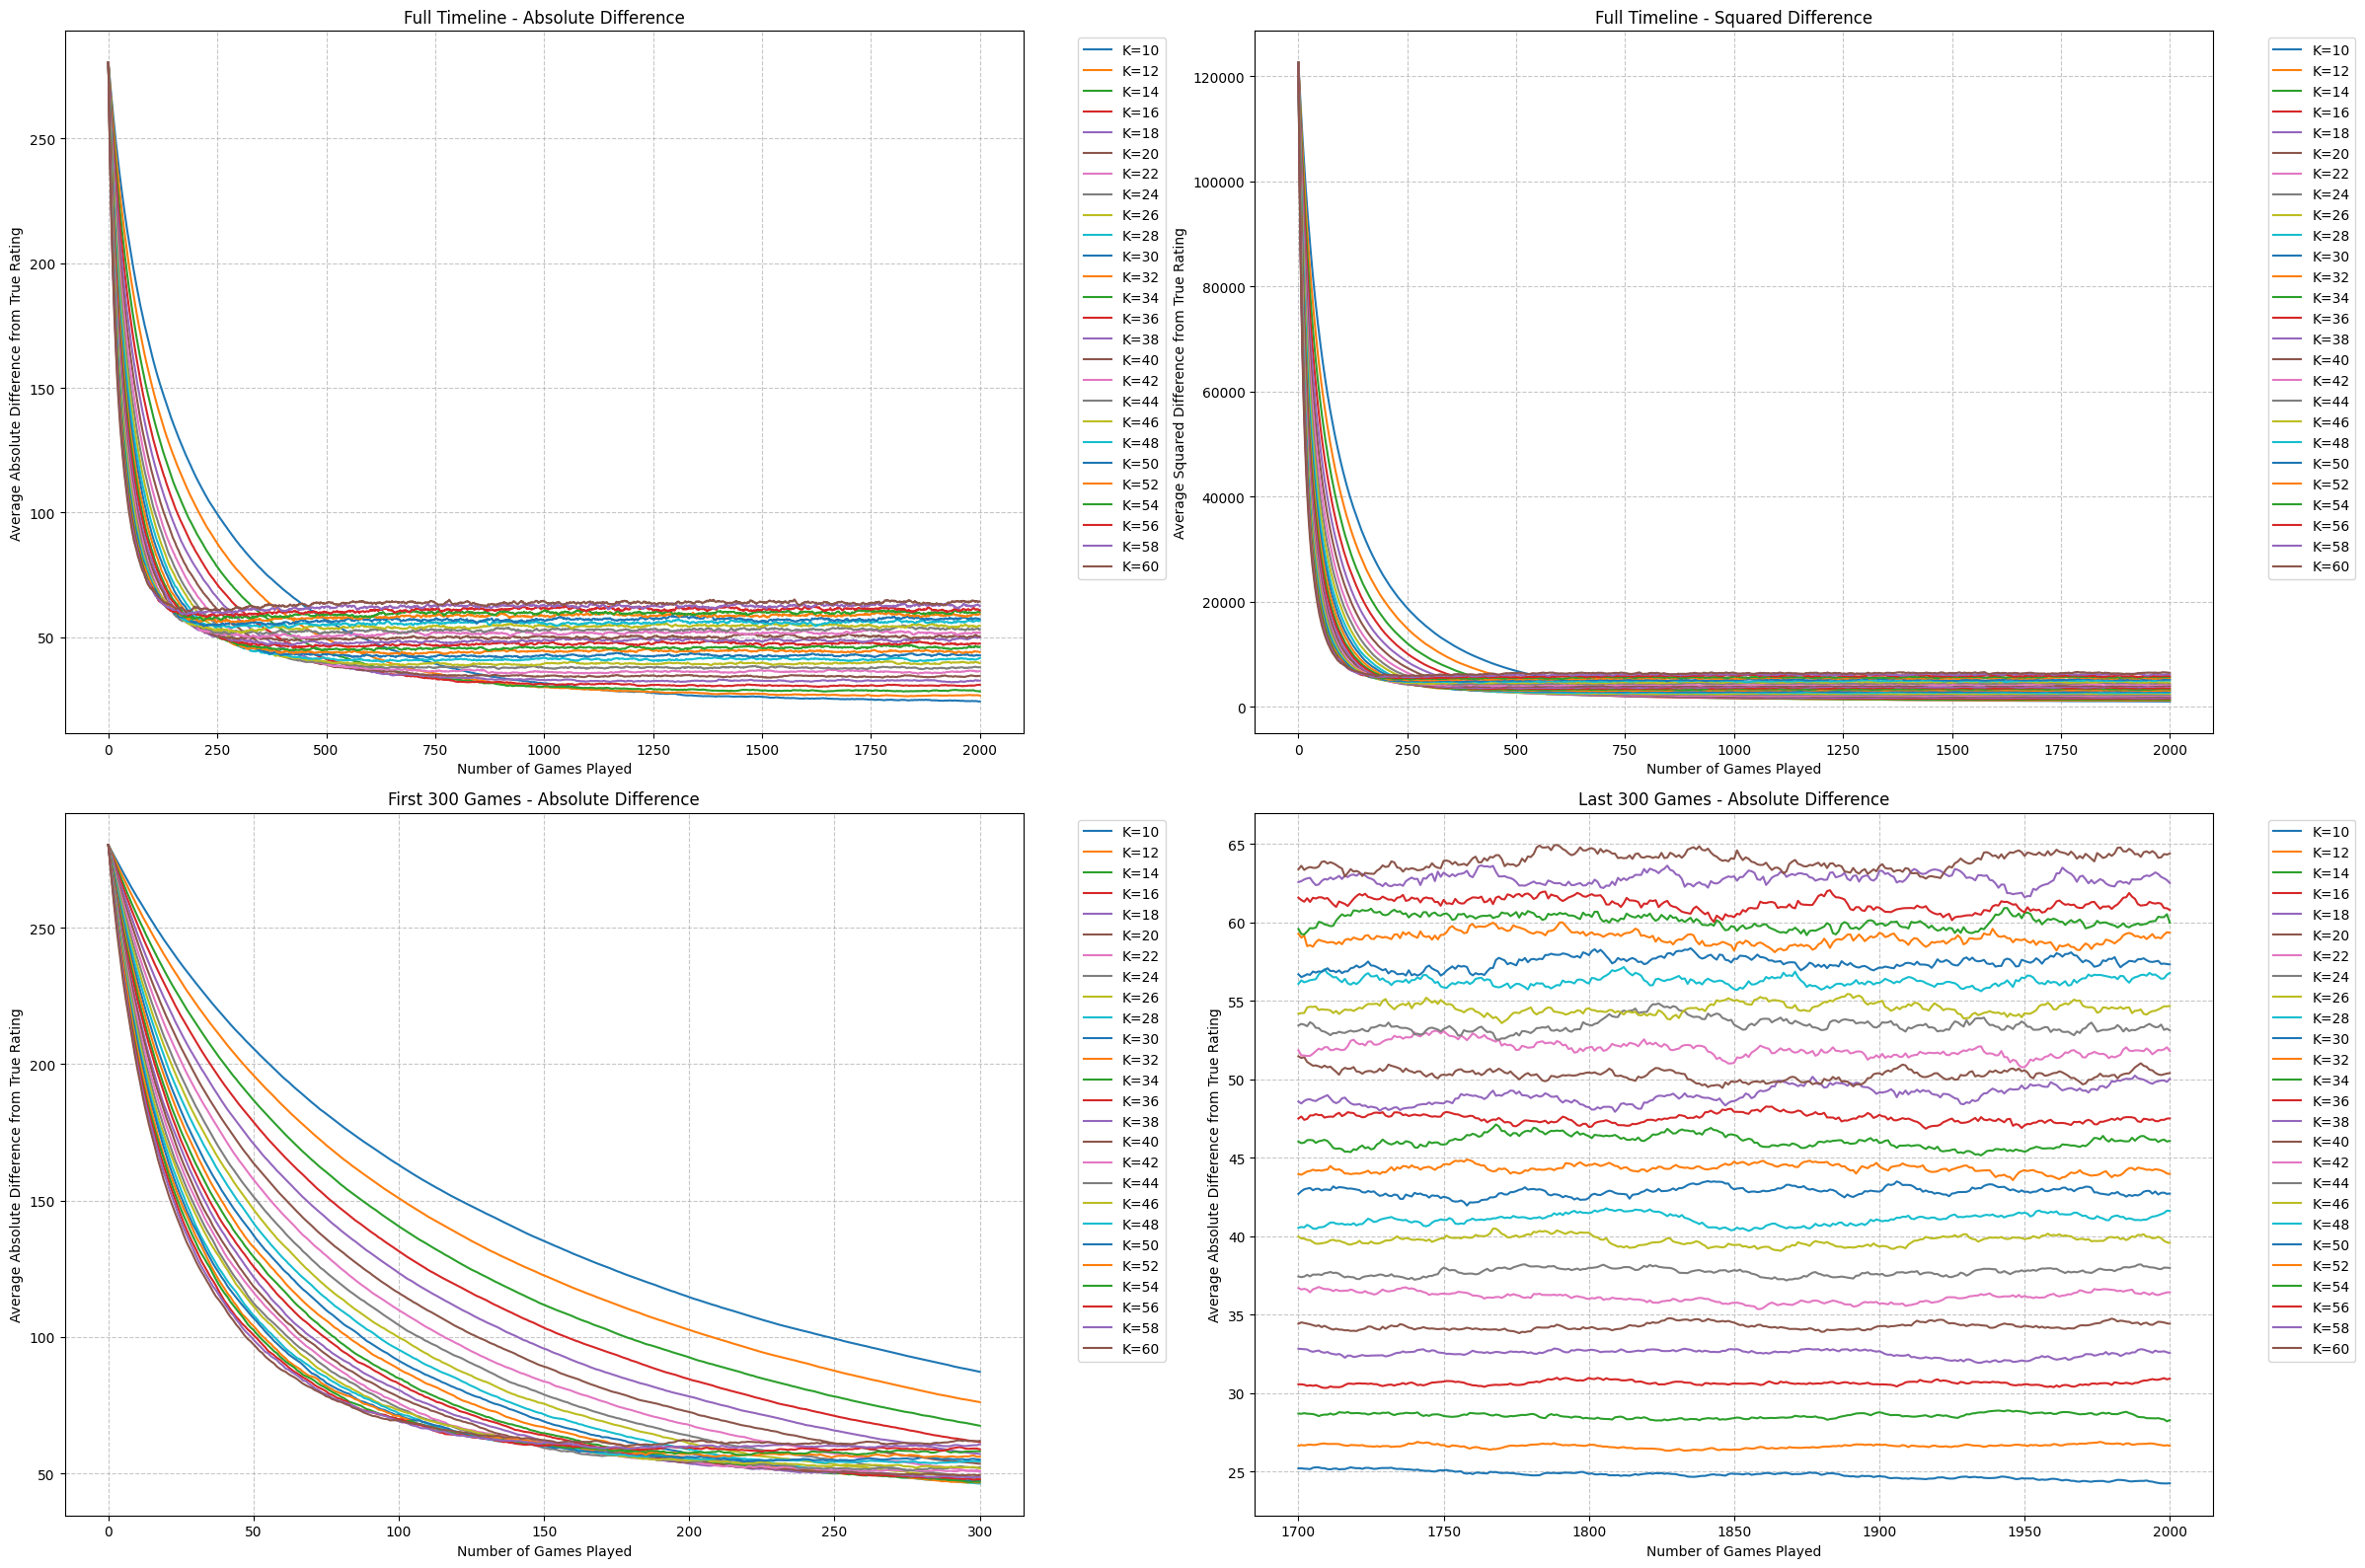

Convergence Statistics for Different K Values:
--------------------------------------------------------------------------------
K Value    Games to        Convergent   Min Value    Max Value   
           Converge        Value        in Zone      in Zone     
--------------------------------------------------------------------------------
10         1763            24.89        24.66        24.98       
12         1368            27.39        27.15        27.56       
14         1249            29.07        28.84        29.20       
16         987             31.16        30.77        31.41       
18         861             33.14        32.91        33.47       
20         757             34.74        34.42        34.87       
22         714             36.48        36.21        36.76       
24         593             38.04        37.66        38.38       
26         584             39.08        38.77        39.33       
28         581             40.65        40.12        41.08       

/Users/edwin/Desktop/rankSystem/analysis_func.py:191: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/Users/edwin/Desktop/rankSystem/analysis_func.py:291: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(exp_func, x_fit, y_fit)


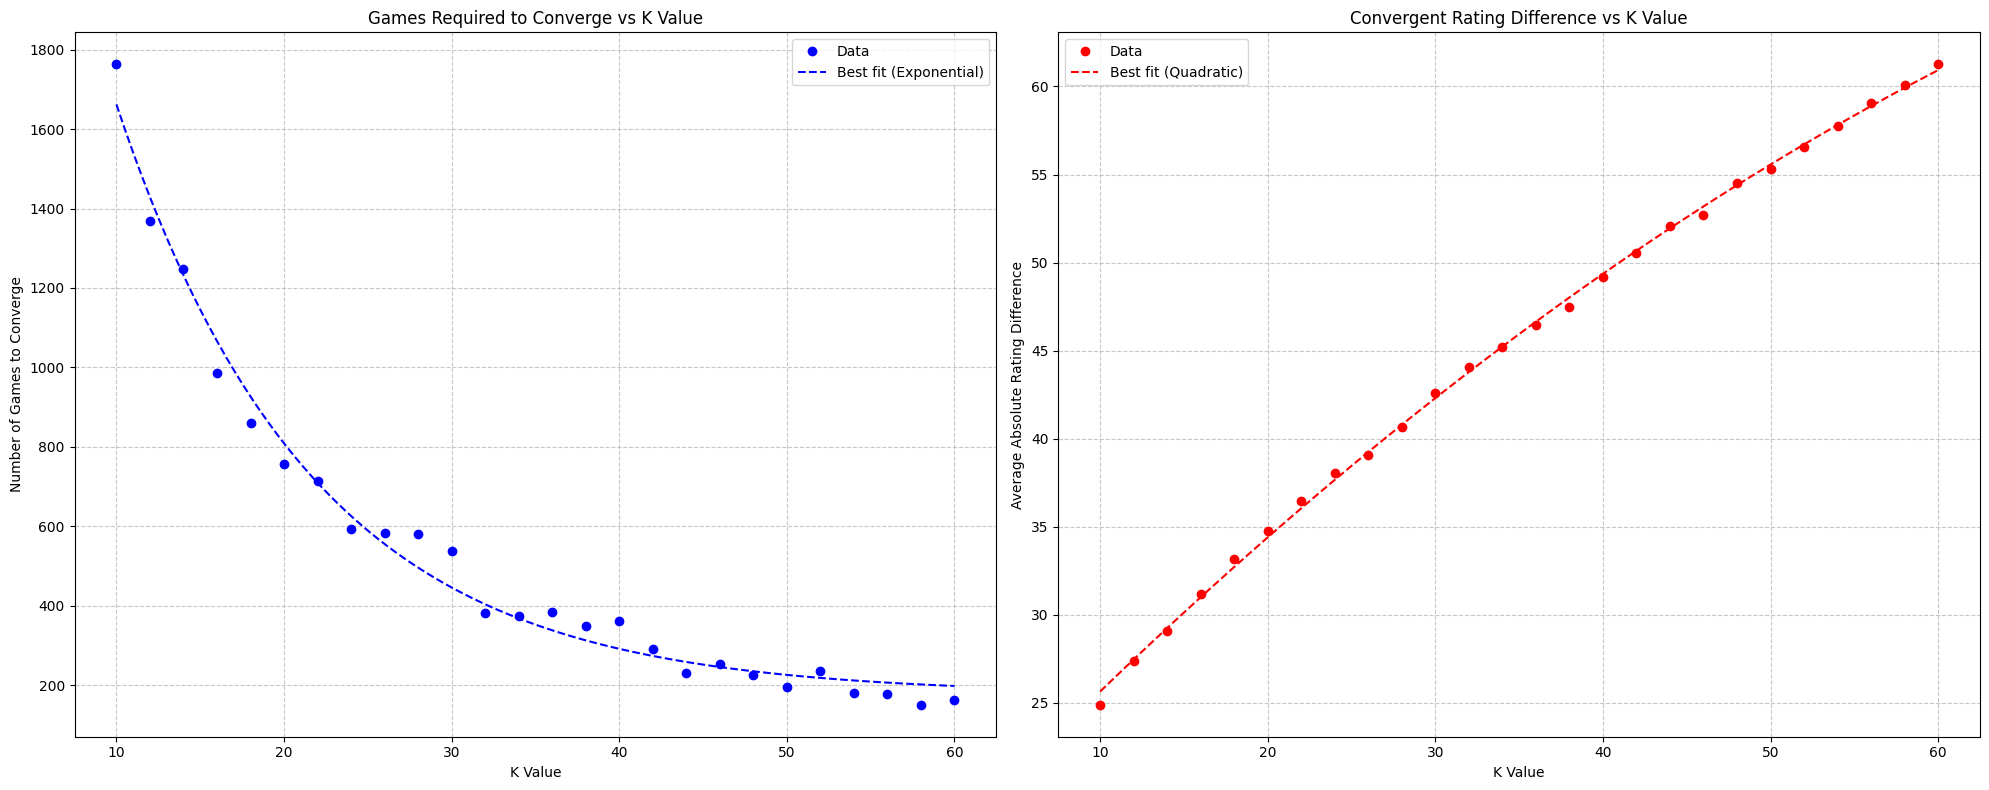

Games to Reach Rating Difference Thresholds:
----------------------------------------------------------------------
K Value    ≤ 100        ≤ 75         ≤ 50         ≤ 25        
----------------------------------------------------------------------
10         248          364          578          1747        
12         208          306          495          Never       
14         179          264          429          Never       
16         158          234          389          Never       
18         141          212          355          Never       
20         128          191          329          Never       
22         116          175          307          Never       
24         108          161          287          Never       
26         100          152          279          Never       
28         93           141          263          Never       
30         88           135          258          Never       
32         83           127          253          Never  

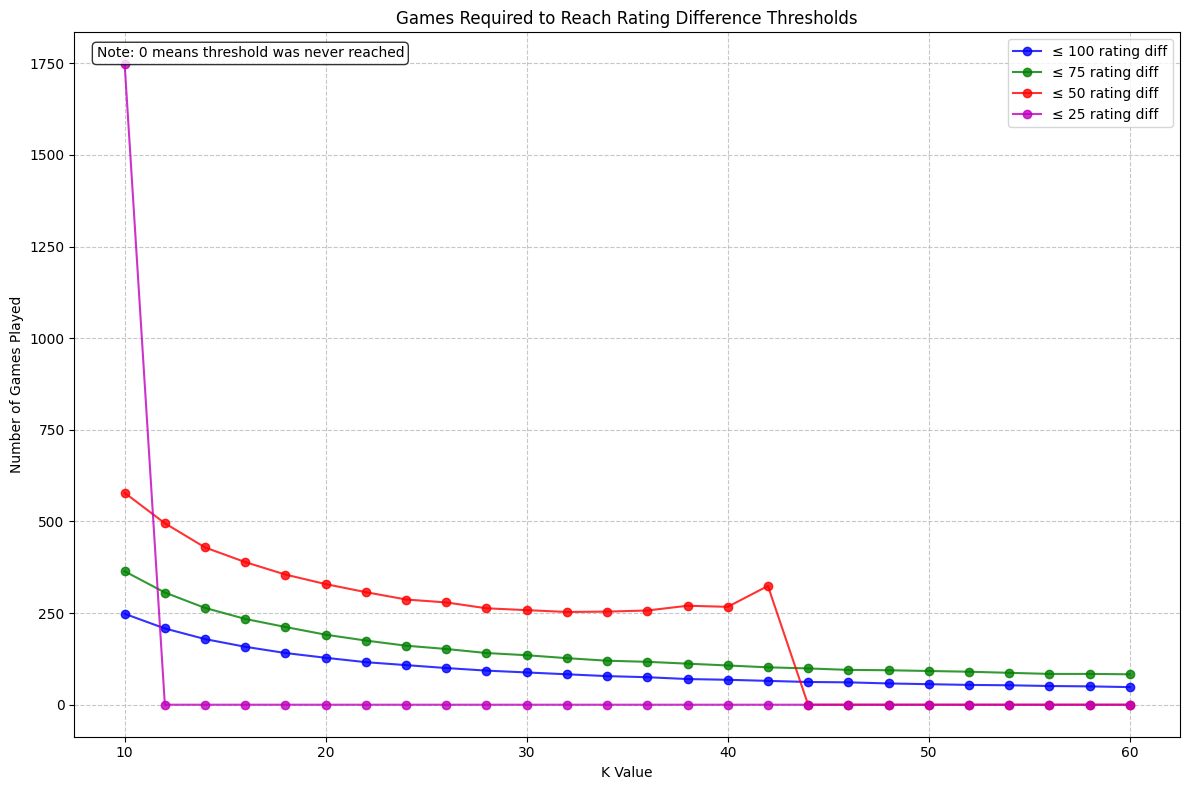


Ranking Deviation for Different K Values:
--------------------------------------------------
K Value    Ranking Deviation (%)
--------------------------------------------------
10         2.17                
12         2.33                
14         2.45                
16         2.58                
18         2.71                
20         2.83                
22         2.94                
24         3.06                
26         3.16                
28         3.26                
30         3.36                
32         3.47                
34         3.56                
36         3.65                
38         3.74                
40         3.83                
42         3.93                
44         4.00                
46         4.09                
48         4.17                
50         4.25                
52         4.33                
54         4.41                
56         4.48                
58         4.55                
60         4.62       

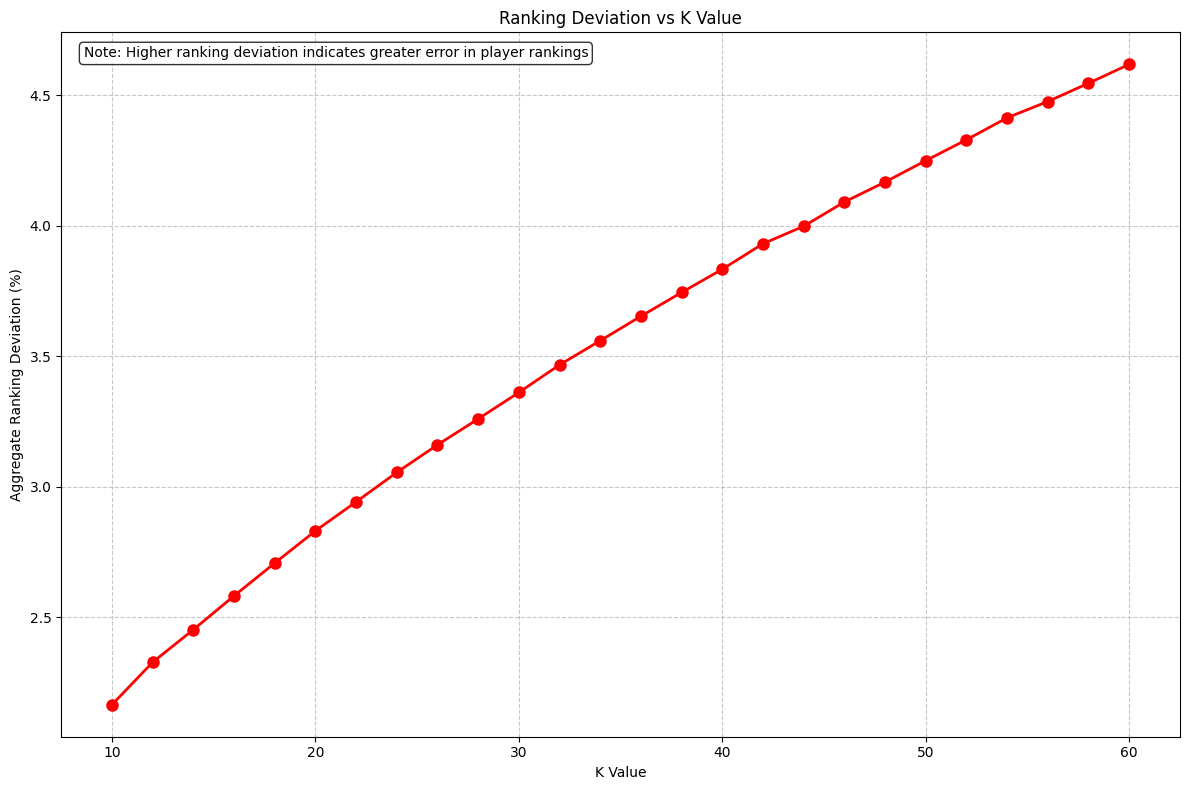


MSE Values for Different K Values:
----------------------------------------------------------------------
K Value    Adjustment MSE            Convergence MSE          
----------------------------------------------------------------------
10         39.24                     2.86                     
12         56.51                     1.36                     
14         76.61                     0.98                     
16         97.65                     0.96                     
18         123.95                    0.61                     
20         153.44                    0.88                     
22         184.06                    0.59                     
24         216.07                    0.84                     
26         255.05                    3.01                     
28         292.49                    1.47                     
30         333.97                    2.14                     
32         379.61                    1.51                     
34 

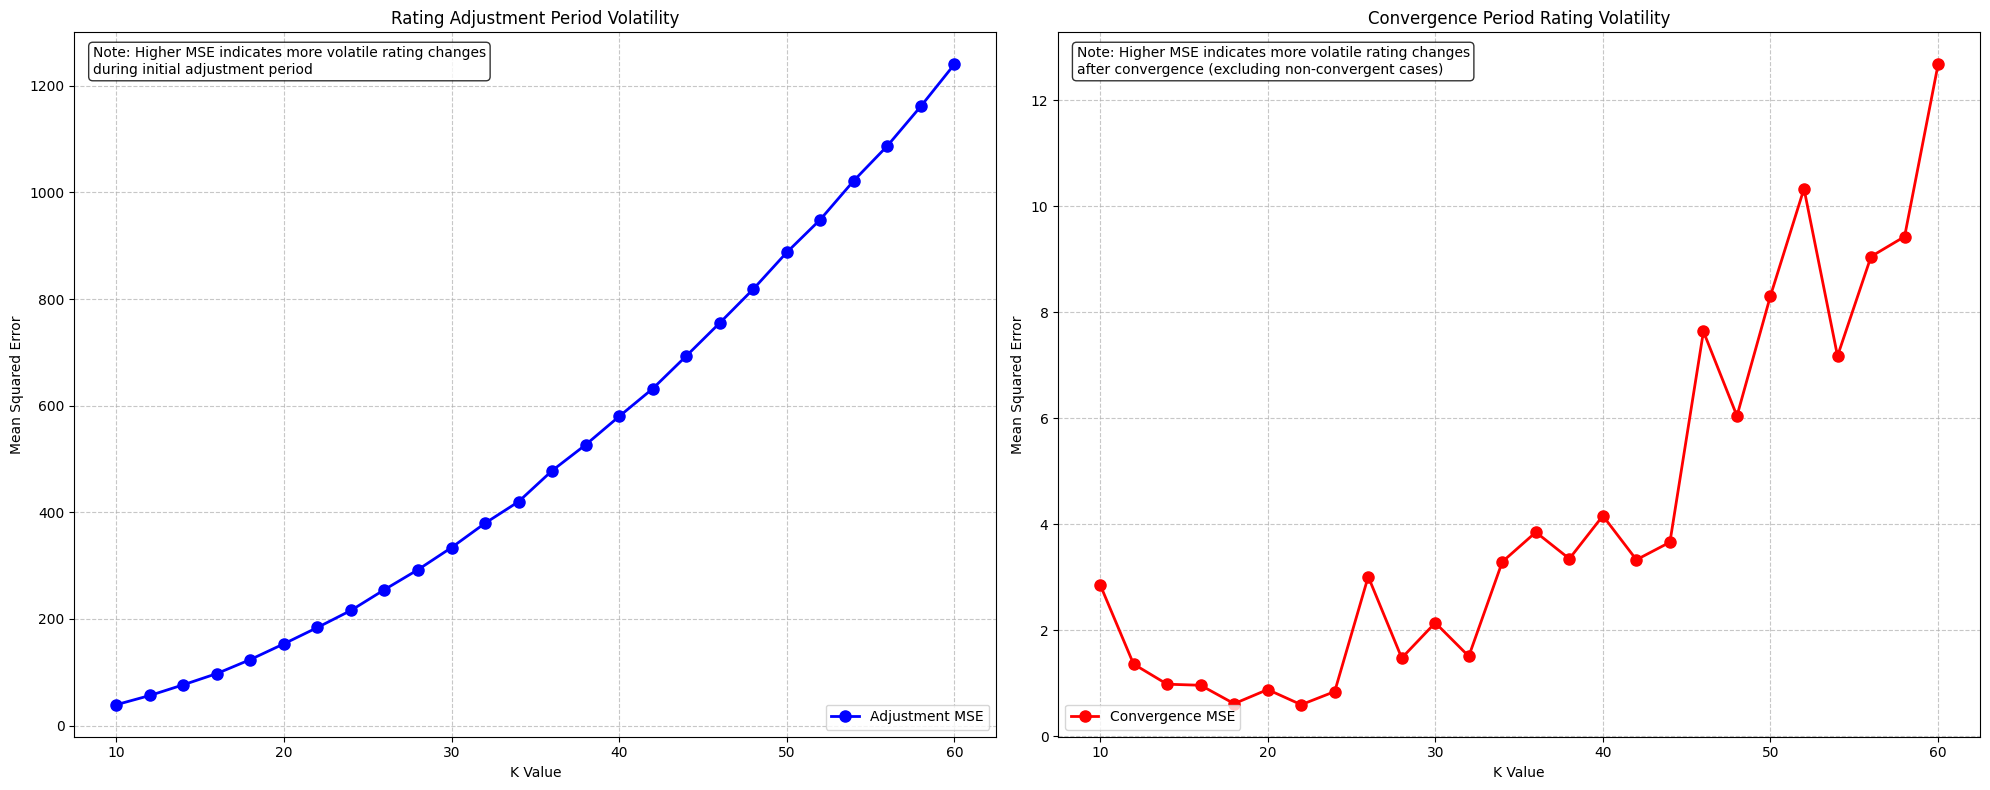

In [7]:
# Graphing and Printing Results

# Analysis of Absolute and Squared Rating Deviation Over Time

graph_aggregate_avg_diffs(num_games, k_values, avg_abs_diff_elo, avg_sq_diff_elo)

# Analysis of Convergence Statistics

print_convergence_stats(k_values, elo_conv_stats)

# Create figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

graph_games_to_converge(k_values, elo_conv_stats, ax1)
graph_convergent_values(k_values, elo_conv_stats, ax2)

plt.tight_layout()
plt.show()

# Analysis of Convergence Thresholds (Speed of convergence)

# Print convergence threshold statistics
print_convergence_threshold_speed(k_values, elo_avg_conv_25, elo_avg_conv_50, elo_avg_conv_75, elo_avg_conv_100)

# Plot each threshold
graph_convergence_thresholds_speed(k_values, elo_avg_conv_25, elo_avg_conv_50, elo_avg_conv_75, elo_avg_conv_100)

# Analysis of Ranking Deviation (Accuracy of Rankings)

# Print ranking deviation statistics
print_ranking_deviation(k_values, elo_ranking_dev)

# Plot ranking deviation
graph_ranking_deviation(k_values, elo_ranking_dev)

# Analysis of Rating Volatility (Based on Mean Squared Error)

# Print rating volatility statistics
print_rating_volatility(k_values, elo_adj_mse, elo_conv_mse)

# Graph rating volatility during adjustment and convergence periods
graph_rating_volatility(k_values, elo_adj_mse, elo_conv_mse)


In [8]:
# Optimal K Value Determination and Summary Table

# Convert metrics to numpy arrays and normalize them
elo_metrics_data = {
    'Adjustment MSE': np.asarray(elo_adj_mse),
    'Convergence MSE': np.asarray(elo_conv_mse),
    'Games to Converge': np.asarray(elo_conv_stats)[:,0],
    'Convergent Value': np.asarray(elo_conv_stats)[:,1],
    'Conv ≤25': np.asarray(elo_avg_conv_25),
    'Conv ≤50': np.asarray(elo_avg_conv_50),
    'Conv ≤75': np.asarray(elo_avg_conv_75),
    'Conv ≤100': np.asarray(elo_avg_conv_100),
    'Ranking Dev': np.asarray(elo_ranking_dev)
}

# Normalize all metrics
elo_norm_metrics = {k: min_normalize(v) for k, v in elo_metrics_data.items()}

print_normed_metrics(k_values, elo_norm_metrics)


Normalized Statistics (0-1 scale):
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
K Value Adjustment MSE      Convergence MSE     Games to Converge   Convergent Value    Conv ≤25            Conv ≤50            Conv ≤75            Conv ≤100           Ranking Dev         
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
10      1.000               0.812               0.000               1.000               1.000               0.000               0.000               0.000               1.000               
12      0.986               0.937               0.245               0.931               0.000               0.255               0.206               0.200               0.934               
14      0.969               0.968  


Weighted Combined Scores (higher is better):
--------------------------------------------------
K Value    Score      Rank      
--------------------------------------------------
20.0       0.704    #1
18.0       0.703    #2
24.0       0.699    #3
22.0       0.699    #4
16.0       0.695    #5
26.0       0.670    #6
28.0       0.669    #7
14.0       0.669    #8
32.0       0.657    #9
30.0       0.650    #10
12.0       0.647    #11
10.0       0.631    #12
34.0       0.629    #13
36.0       0.604    #14
38.0       0.596    #15
40.0       0.568    #16
42.0       0.557    #17
44.0       0.505    #18
46.0       0.454    #19
48.0       0.450    #20
50.0       0.419    #21
54.0       0.394    #22
52.0       0.380    #23
56.0       0.362    #24
58.0       0.345    #25
60.0       0.299    #26
--------------------------------------------------


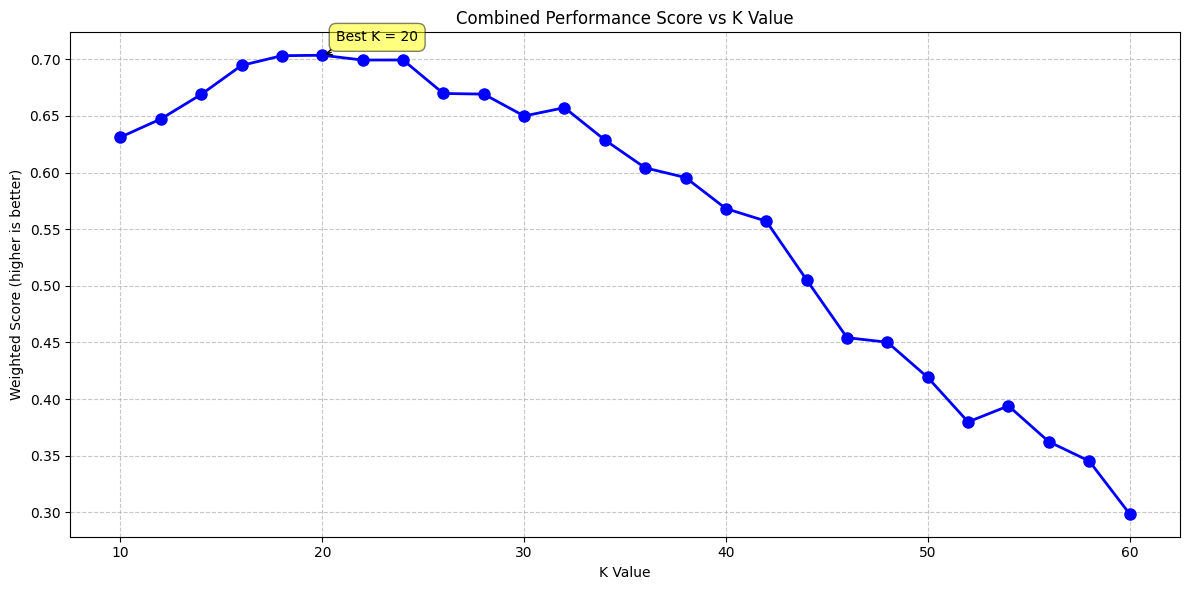

In [9]:
# Finding the optimal K value based on weighted metrics

spd, acc, vol = 0.4, 0.4, 0.2  # Speed, Accuracy, Volatility weights

# Define weights for each metric
# Adjustable eights for main categories: Speed, Accuracy, Volatility
weights = {
    # Speed 
    'Games to Converge': spd * 0.5,
    'Conv ≤25': spd * 0.125,
    'Conv ≤50': spd * 0.125,
    'Conv ≤75': spd * 0.125,
    'Conv ≤100': spd * 0.125,
    # Accuracy 
    'Ranking Dev': acc * 0.5,
    'Convergent Value': acc * 0.5,
    # Volatility 
    'Adjustment MSE': vol * 0.5,
    'Convergence MSE': vol * 0.5
}

# Calculate weighted scores
elo_weighted_scores = []

for i in range(k_len):
    score = sum(elo_norm_metrics[metric][i] * weights[metric] for metric in weights.keys())
    elo_weighted_scores.append(score)

# Create sorted weighted scores
# Combine the arrays into a (N, 2) array
results = np.vstack((k_values, elo_weighted_scores)).T

# Sort the combined array by the second column (scores), descending
sorted_scores = results[results[:, 1].argsort()[::-1]]

# Print results
print_optimal_param(sorted_scores)

# Plot results
graph_optimal_param(k_values, elo_weighted_scores)

In [ ]:
# Initializing Glicko Parameters

num_players = 10000
init_rating = np.full(num_players, 1500, dtype=np.float32)
init_true_rating = np.random.normal(1500, 350, num_players).astype(np.float32)
init_rd = np.full(num_players, 350, dtype=np.float32)

glicko = [] # glicko[i] refers to the simulation with i games per rating period
k_range = (1, 31, 1)
k_len = len(range(*k_range))
k_values = np.array(range(*k_range))

In [11]:
# Initalizing Glicko Simulations

# Creating the Glicko simulations with K constants from 10 to 80 
for k_const in range(*k_range):
    glicko.append(Glicko(num_players, init_rating, init_true_rating, init_rd))

In [12]:
# Simulate Matches and Data Collection
num_games = 2500
rank_period = 50

# Running the simulations and collecting data
avg_abs_diff_glicko, avg_sq_diff_glicko, glicko_ranking_dev, glicko_adj_period_ratings = run_simulation(
    glicko, num_games, num_players, k_len, rank_period, model_name="glicko", match_type="random")

In [13]:
# Post Simulation Data Collection

# Average number of games for player to be within 25, 50, 75, 100 rating from their true rating
glicko_avg_conv_25, glicko_avg_conv_50, glicko_avg_conv_75, glicko_avg_conv_100 = avg_games_to_threshold(avg_abs_diff_glicko)

# Number of games for players to converge to stationary avg deviation, incl: lowest avg deviation, highest avg deviation
# Volatility analysis based on mean squared error of linear regression on convergent period data
glicko_conv_stats, glicko_conv_mse = conv_stats_mse(k_len, num_games, avg_abs_diff_glicko)

# Volatility analysis based on mean squared error of linear regression on adjustment period data
glicko_adj_mse = adj_mse(k_len, num_players, glicko_adj_period_ratings)

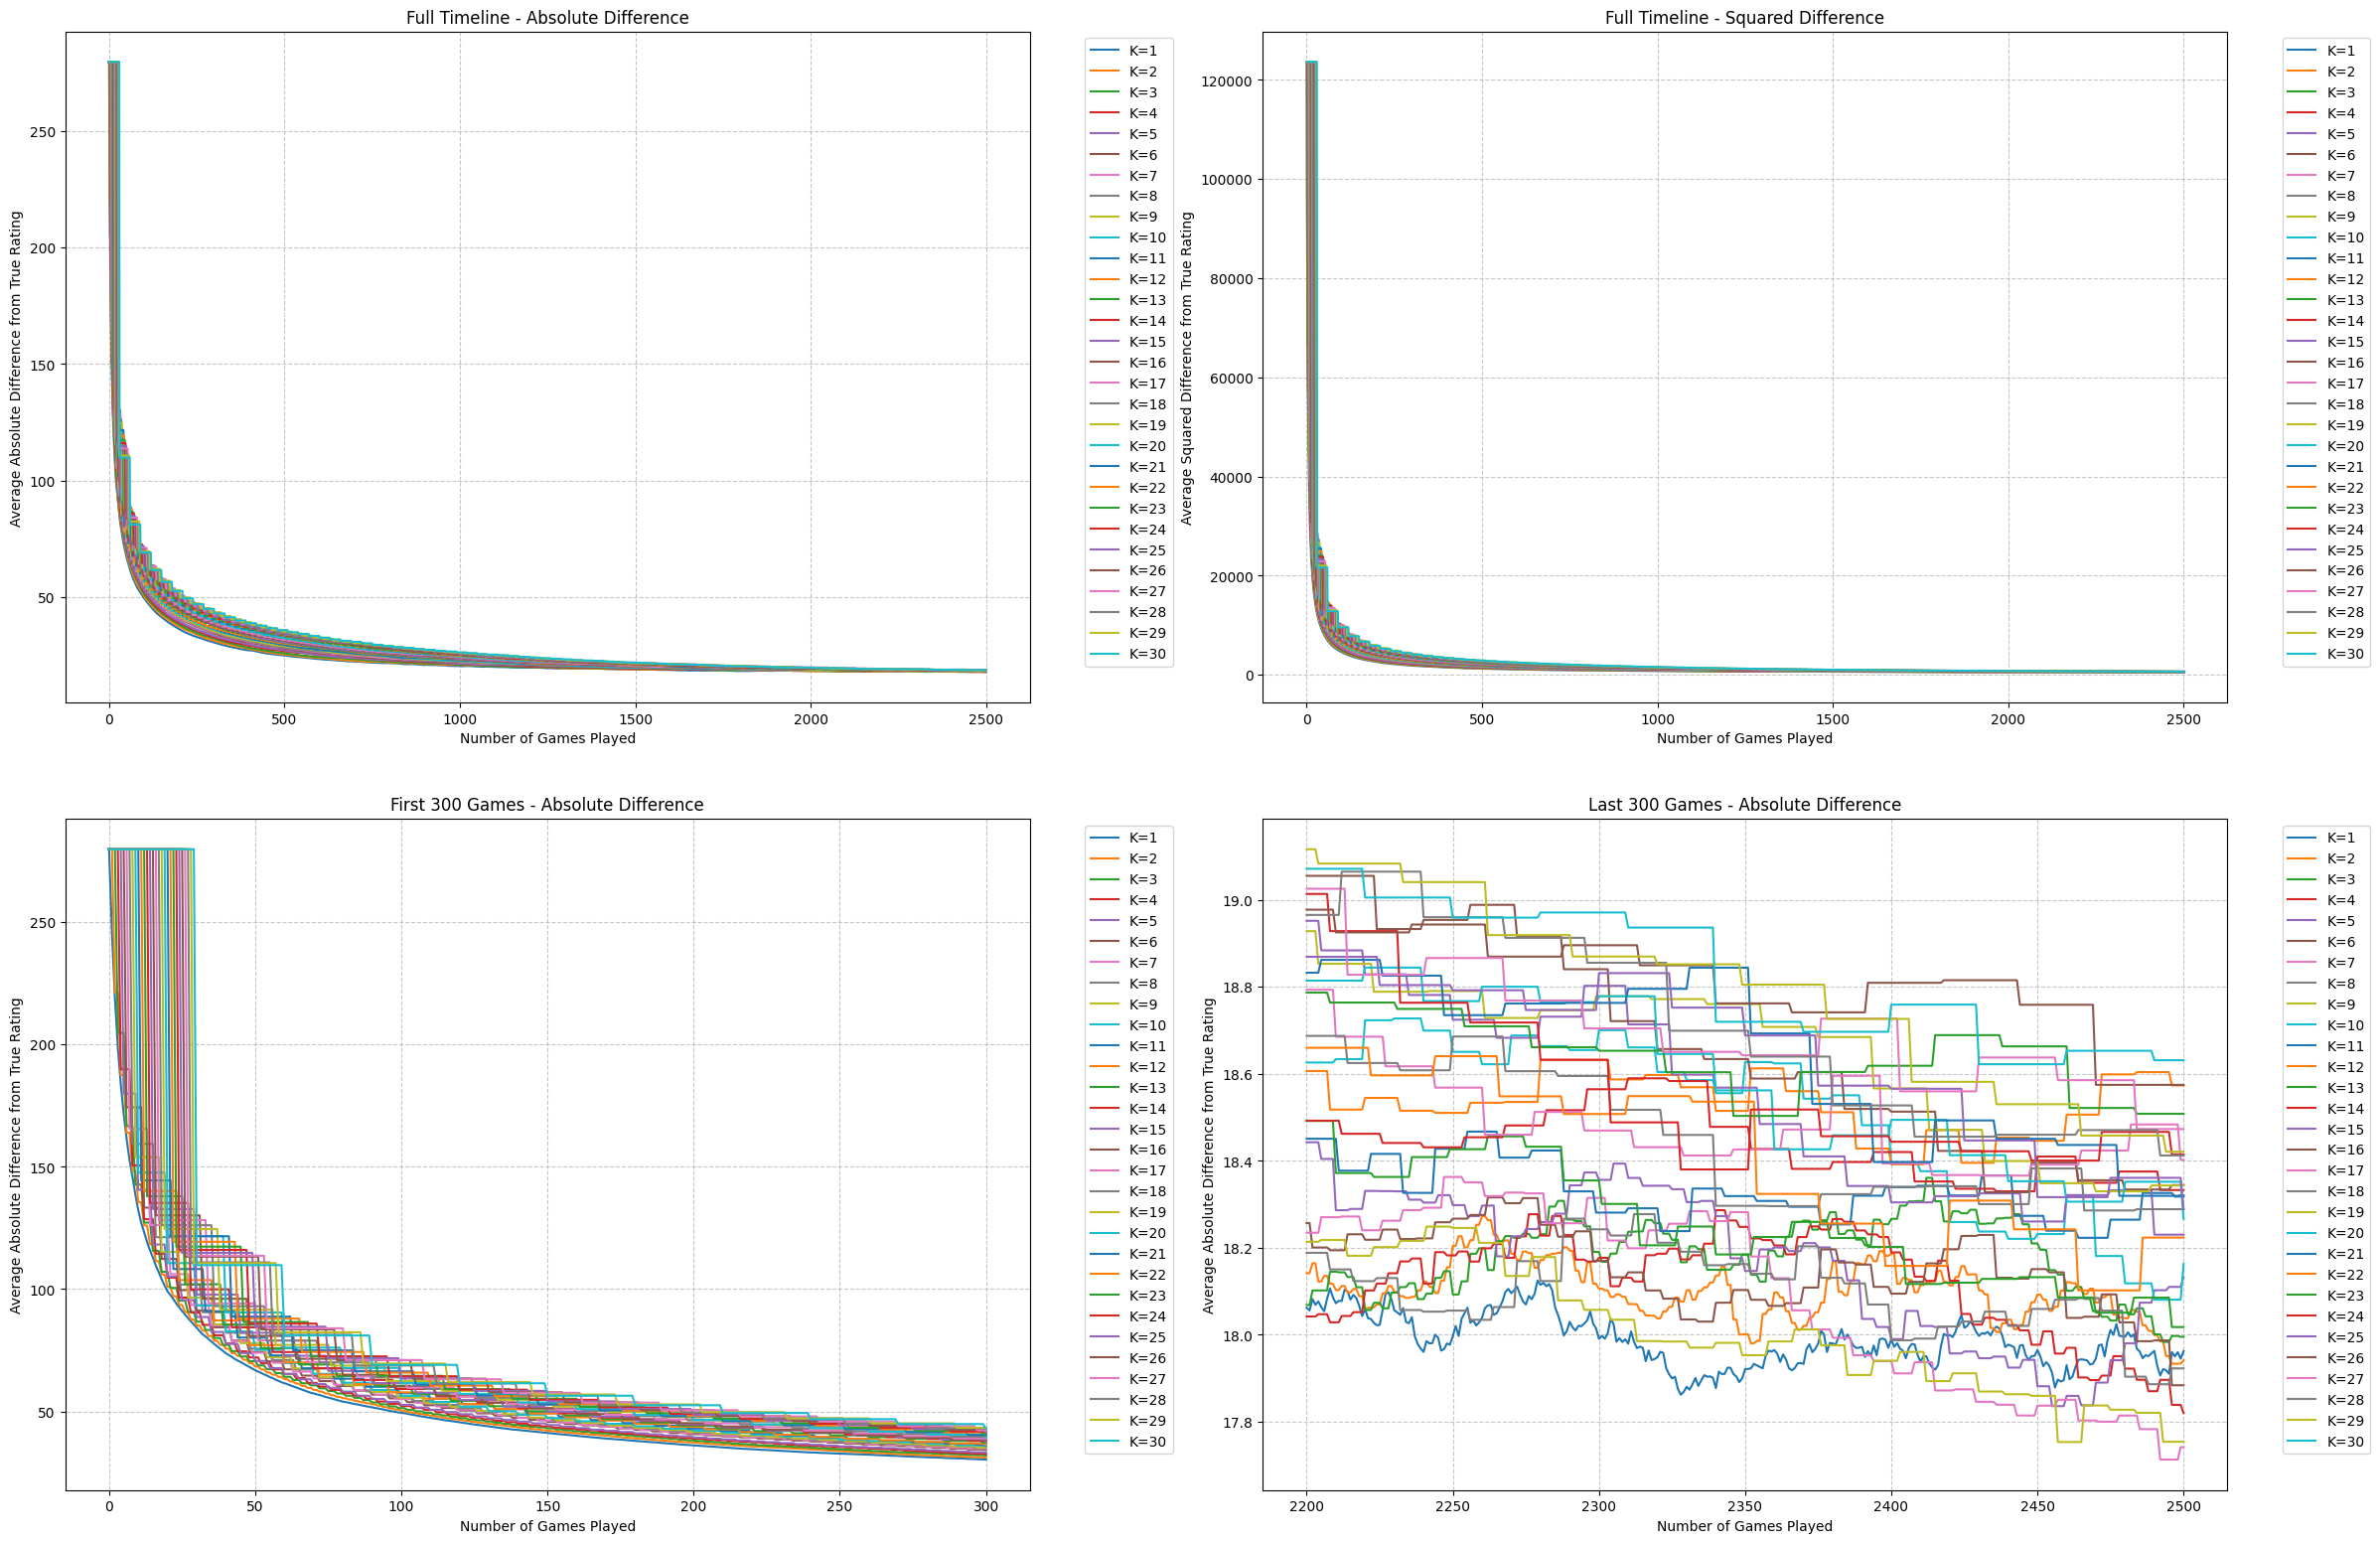

Convergence Statistics for Different K Values:
--------------------------------------------------------------------------------
K Value    Games to        Convergent   Min Value    Max Value   
           Converge        Value        in Zone      in Zone     
--------------------------------------------------------------------------------
1          1239            19.43        19.26        19.55       
2          1280            19.42        19.25        19.49       
3          1418            19.28        19.15        19.36       
4          1464            19.23        19.09        19.30       
5          1217            20.23        20.09        20.36       
6          1517            19.29        19.12        19.31       
7          1602            19.47        19.37        19.59       
8          1869            18.58        18.43        18.63       
9          1393            20.13        20.02        20.24       
10         1593            19.46        19.35        19.51       

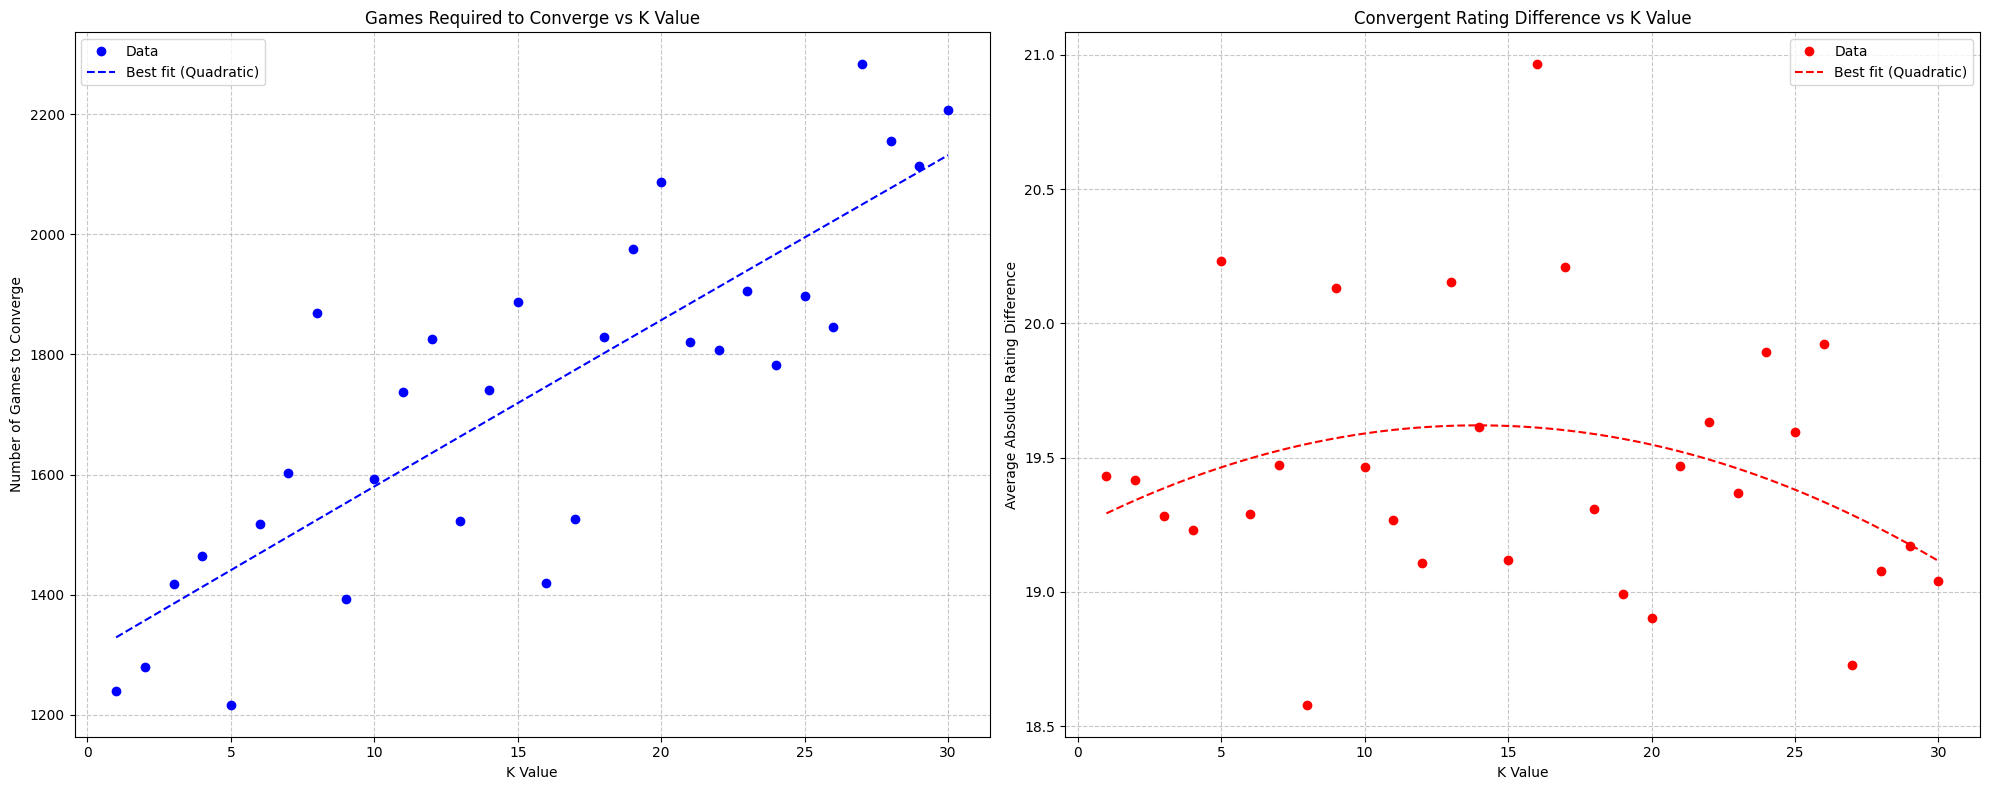

Games to Reach Rating Difference Thresholds:
----------------------------------------------------------------------
K Value    ≤ 100        ≤ 75         ≤ 50         ≤ 25        
----------------------------------------------------------------------
1          20           39           98           493         
2          22           42           102          524         
3          24           42           108          546         
4          24           44           112          608         
5          25           45           115          610         
6          24           48           126          666         
7          28           49           126          686         
8          32           56           128          728         
9          27           54           135          738         
10         30           60           140          770         
11         33           55           143          759         
12         36           60           144          816    

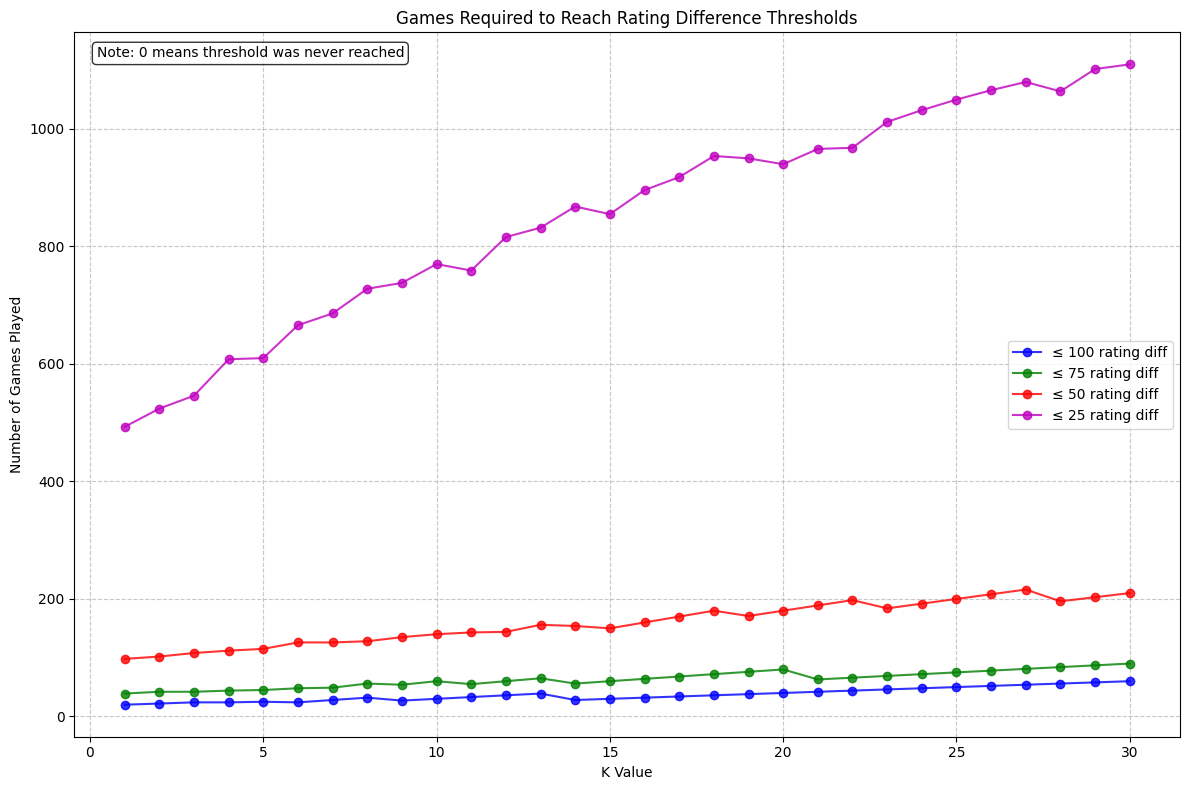


Ranking Deviation for Different K Values:
--------------------------------------------------
K Value    Ranking Deviation (%)
--------------------------------------------------
1          1.57                
2          1.57                
3          1.56                
4          1.57                
5          1.56                
6          1.57                
7          1.57                
8          1.57                
9          1.57                
10         1.57                
11         1.58                
12         1.57                
13         1.59                
14         1.58                
15         1.58                
16         1.58                
17         1.61                
18         1.60                
19         1.60                
20         1.58                
21         1.58                
22         1.59                
23         1.58                
24         1.58                
25         1.57                
26         1.64       

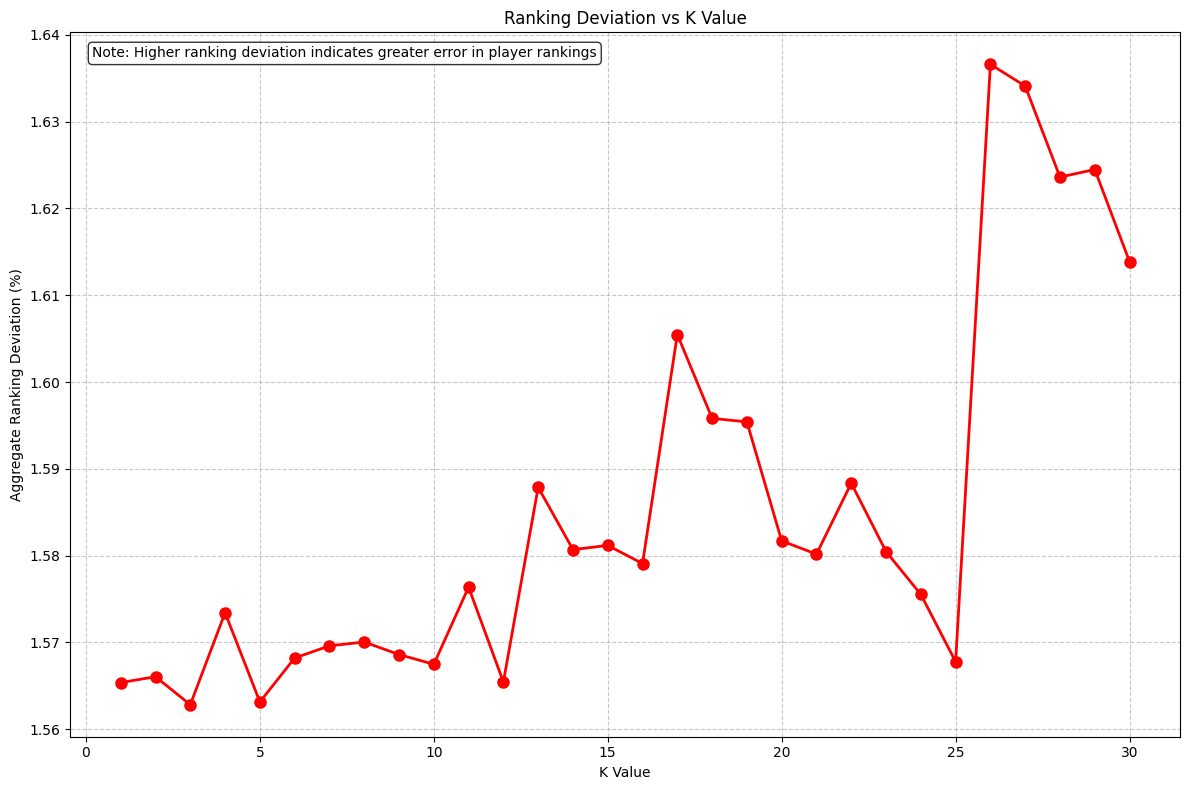


MSE Values for Different K Values:
----------------------------------------------------------------------
K Value    Adjustment MSE            Convergence MSE          
----------------------------------------------------------------------
1          5318.72                   0.82                     
2          5719.51                   0.99                     
3          5992.42                   1.34                     
4          6192.17                   1.47                     
5          6210.99                   0.28                     
6          6094.76                   1.57                     
7          6051.76                   1.28                     
8          5810.91                   3.29                     
9          5630.13                   0.47                     
10         5308.96                   1.87                     
11         4992.89                   2.17                     
12         4938.79                   2.96                     
13 

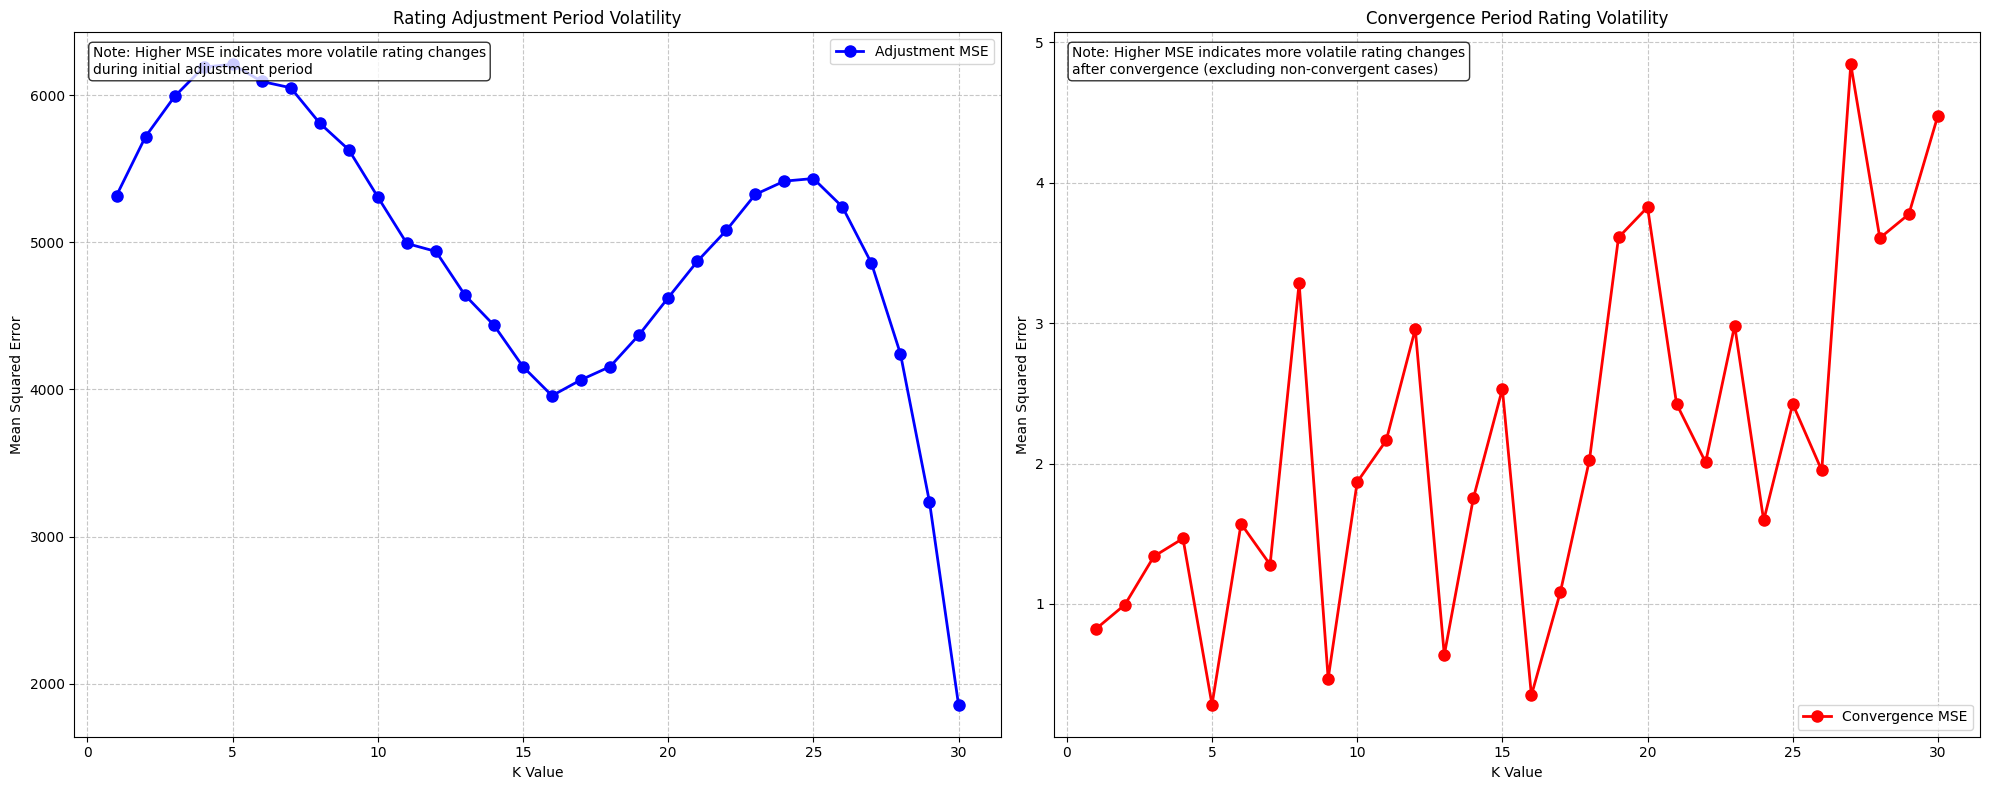

In [14]:
# Graphing and Printing Results

# Analysis of Absolute and Squared Rating Deviation Over Time

graph_aggregate_avg_diffs(num_games, k_values, avg_abs_diff_glicko, avg_sq_diff_glicko)

# Analysis of Convergence Statistics

print_convergence_stats(k_values, glicko_conv_stats)

# Create figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

graph_games_to_converge(k_values, glicko_conv_stats, ax1)
graph_convergent_values(k_values, glicko_conv_stats, ax2)

plt.tight_layout()
plt.show()

# Analysis of Convergence Thresholds (Speed of convergence)

# Print convergence threshold statistics
print_convergence_threshold_speed(k_values, glicko_avg_conv_25, glicko_avg_conv_50, glicko_avg_conv_75, glicko_avg_conv_100)

# Plot each threshold
graph_convergence_thresholds_speed(k_values, glicko_avg_conv_25, glicko_avg_conv_50, glicko_avg_conv_75, glicko_avg_conv_100)

# Analysis of Ranking Deviation (Accuracy of Rankings)

# Print ranking deviation statistics
print_ranking_deviation(k_values, glicko_ranking_dev)

# Plot ranking deviation
graph_ranking_deviation(k_values, glicko_ranking_dev)

# Analysis of Rating Volatility (Based on Mean Squared Error)

# Print rating volatility statistics
print_rating_volatility(k_values, glicko_adj_mse, glicko_conv_mse)

# Graph rating volatility during adjustment and convergence periods
graph_rating_volatility(k_values, glicko_adj_mse, glicko_conv_mse)


In [15]:
# Optimal K Value Determination and Summary Table

# Convert metrics to numpy arrays and normalize them
glicko_metrics_data = {
    'Adjustment MSE': np.asarray(glicko_adj_mse),
    'Convergence MSE': np.asarray(glicko_conv_mse),
    'Games to Converge': np.asarray(glicko_conv_stats)[:,0],
    'Convergent Value': np.asarray(glicko_conv_stats)[:,1],
    'Conv ≤25': np.asarray(glicko_avg_conv_25),
    'Conv ≤50': np.asarray(glicko_avg_conv_50),
    'Conv ≤75': np.asarray(glicko_avg_conv_75),
    'Conv ≤100': np.asarray(glicko_avg_conv_100),
    'Ranking Dev': np.asarray(glicko_ranking_dev)
}

# Normalize all metrics
glicko_norm_metrics = {k: min_normalize(v) for k, v in glicko_metrics_data.items()}

print_normed_metrics(k_values, glicko_norm_metrics)


Normalized Statistics (0-1 scale):
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
K Value Adjustment MSE      Convergence MSE     Games to Converge   Convergent Value    Conv ≤25            Conv ≤50            Conv ≤75            Conv ≤100           Ranking Dev         
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
1       0.205               0.882               0.979               0.643               1.000               1.000               1.000               1.000               0.965               
2       0.113               0.844               0.941               0.649               0.950               0.966               0.941               0.950               0.956               
3       0.050               0.768  


Weighted Combined Scores (higher is better):
--------------------------------------------------
K Value    Score      Rank      
--------------------------------------------------
1.0        0.826    #1
2.0        0.795    #2
3.0        0.769    #3
5.0        0.732    #4
4.0        0.720    #5
6.0        0.704    #6
9.0        0.672    #7
7.0        0.669    #8
10.0       0.655    #9
8.0        0.638    #10
11.0       0.622    #11
12.0       0.619    #12
14.0       0.594    #13
15.0       0.593    #14
16.0       0.570    #15
13.0       0.570    #16
21.0       0.521    #17
18.0       0.519    #18
17.0       0.510    #19
24.0       0.488    #20
25.0       0.483    #21
22.0       0.482    #22
20.0       0.481    #23
23.0       0.478    #24
19.0       0.477    #25
30.0       0.348    #26
29.0       0.318    #27
28.0       0.313    #28
26.0       0.284    #29
27.0       0.244    #30
--------------------------------------------------


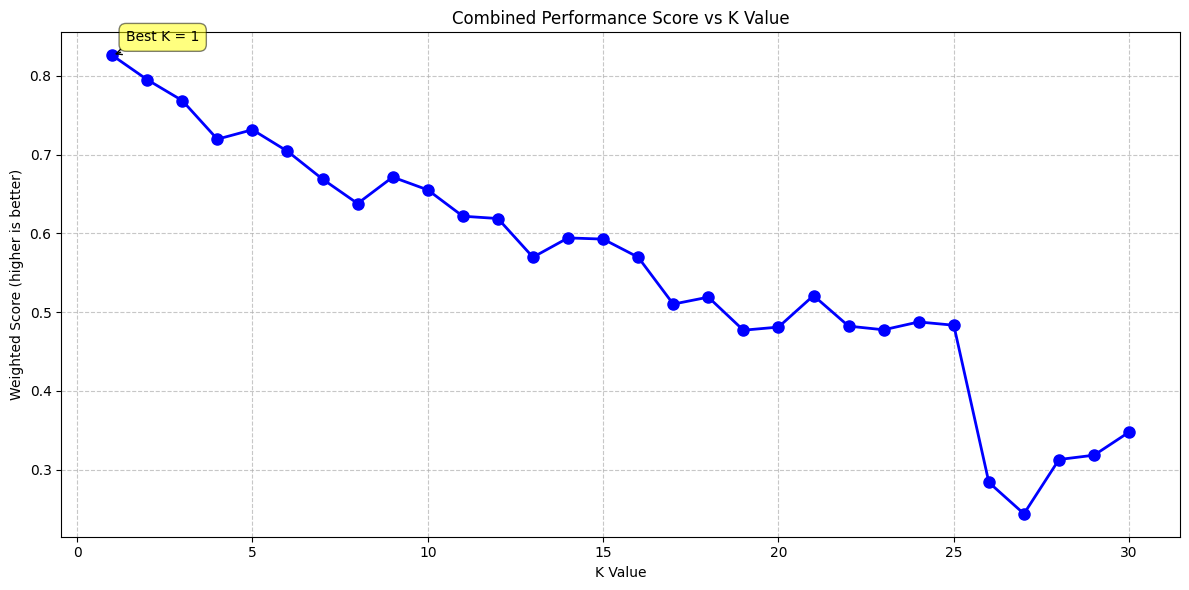

In [16]:
# Finding the optimal K value based on weighted metrics

# Already defined above
# spd, acc, vol = 0.4, 0.4, 0.2  # Speed, Accuracy, Volatility weights

# # Define weights for each metric
# # Adjustable eights for main categories: Speed, Accuracy, Volatility
# weights = {
#     # Speed 
#     'Games to Converge': spd * 0.5,
#     'Conv ≤25': spd * 0.125,
#     'Conv ≤50': spd * 0.125,
#     'Conv ≤75': spd * 0.125,
#     'Conv ≤100': spd * 0.125,
#     # Accuracy 
#     'Ranking Dev': acc * 0.5,
#     'Convergent Value': acc * 0.5,
#     # Volatility 
#     'Adjustment MSE': vol * 0.5,
#     'Convergence MSE': vol * 0.5
# }

# Calculate weighted scores
glicko_weighted_scores = []

for i in range(k_len):
    score = sum(glicko_norm_metrics[metric][i] * weights[metric] for metric in weights.keys())
    glicko_weighted_scores.append(score)

# Create sorted weighted scores
# Combine the arrays into a (N, 2) array
results = np.vstack((k_values, glicko_weighted_scores)).T

# Sort the combined array by the second column (scores), descending
glicko_sorted_scores = results[results[:, 1].argsort()[::-1]]

# Print results
print_optimal_param(glicko_sorted_scores)

# Plot results
graph_optimal_param(k_values, glicko_weighted_scores)

In [ ]:
# Initializing glicko2 Parameters

num_players = 100
init_rating = np.full(num_players, 1500, dtype=np.float32)
init_true_rating = np.random.normal(1500, 350, num_players).astype(np.float32)
init_rd = np.full(num_players, 350, dtype=np.float32)
init_vol = np.full(num_players, 0.06, dtype=np.float32)
vol_const = 0.6

glicko2 = [] # glicko2[i] refers to the simulation with K constant = i+10
k_range = (1, 31, 3)
k_len = len(range(*k_range))
k_values = np.array(range(*k_range))
# k_values = np.array(range(*k_range)) / 100


[0.01 0.04 0.07 0.1  0.13 0.16 0.19 0.22 0.25 0.28]


In [ ]:
# Initalizing glicko2 Simulations

# Creating the glicko2 simulations with K constants from 10 to 80 
for k_const in k_values:
    glicko2.append(Glicko2(num_players, init_rating, init_true_rating, init_rd, init_vol, vol_const))

    # glicko2.append(Glicko2(num_players, init_rating, init_true_rating, init_rd, np.full(num_players, k_const, dtype=np.float32), vol_const))

In [ ]:
# Simulate Matches and Data Collection
num_games = 1000
rank_period = 50

# Running the simulations and collecting data
avg_abs_diff_glicko2, avg_sq_diff_glicko2, glicko2_ranking_dev, glicko2_adj_period_ratings = run_simulation(
    glicko2, num_games, num_players, k_len, rank_period, model_name="glicko2", match_type="random")

In [67]:
# Post Simulation Data Collection

# Average number of games for player to be within 25, 50, 75, 100 rating from their true rating
glicko2_avg_conv_25, glicko2_avg_conv_50, glicko2_avg_conv_75, glicko2_avg_conv_100 = avg_games_to_threshold(avg_abs_diff_glicko2)

# Number of games for players to converge to stationary avg deviation, incl: lowest avg deviation, highest avg deviation
# Volatility analysis based on mean squared error of linear regression on convergent period data
glicko2_conv_stats, glicko2_conv_mse = conv_stats_mse(k_len, num_games, avg_abs_diff_glicko2)

# Volatility analysis based on mean squared error of linear regression on adjustment period data
glicko2_adj_mse = adj_mse(k_len, num_players, glicko2_adj_period_ratings)

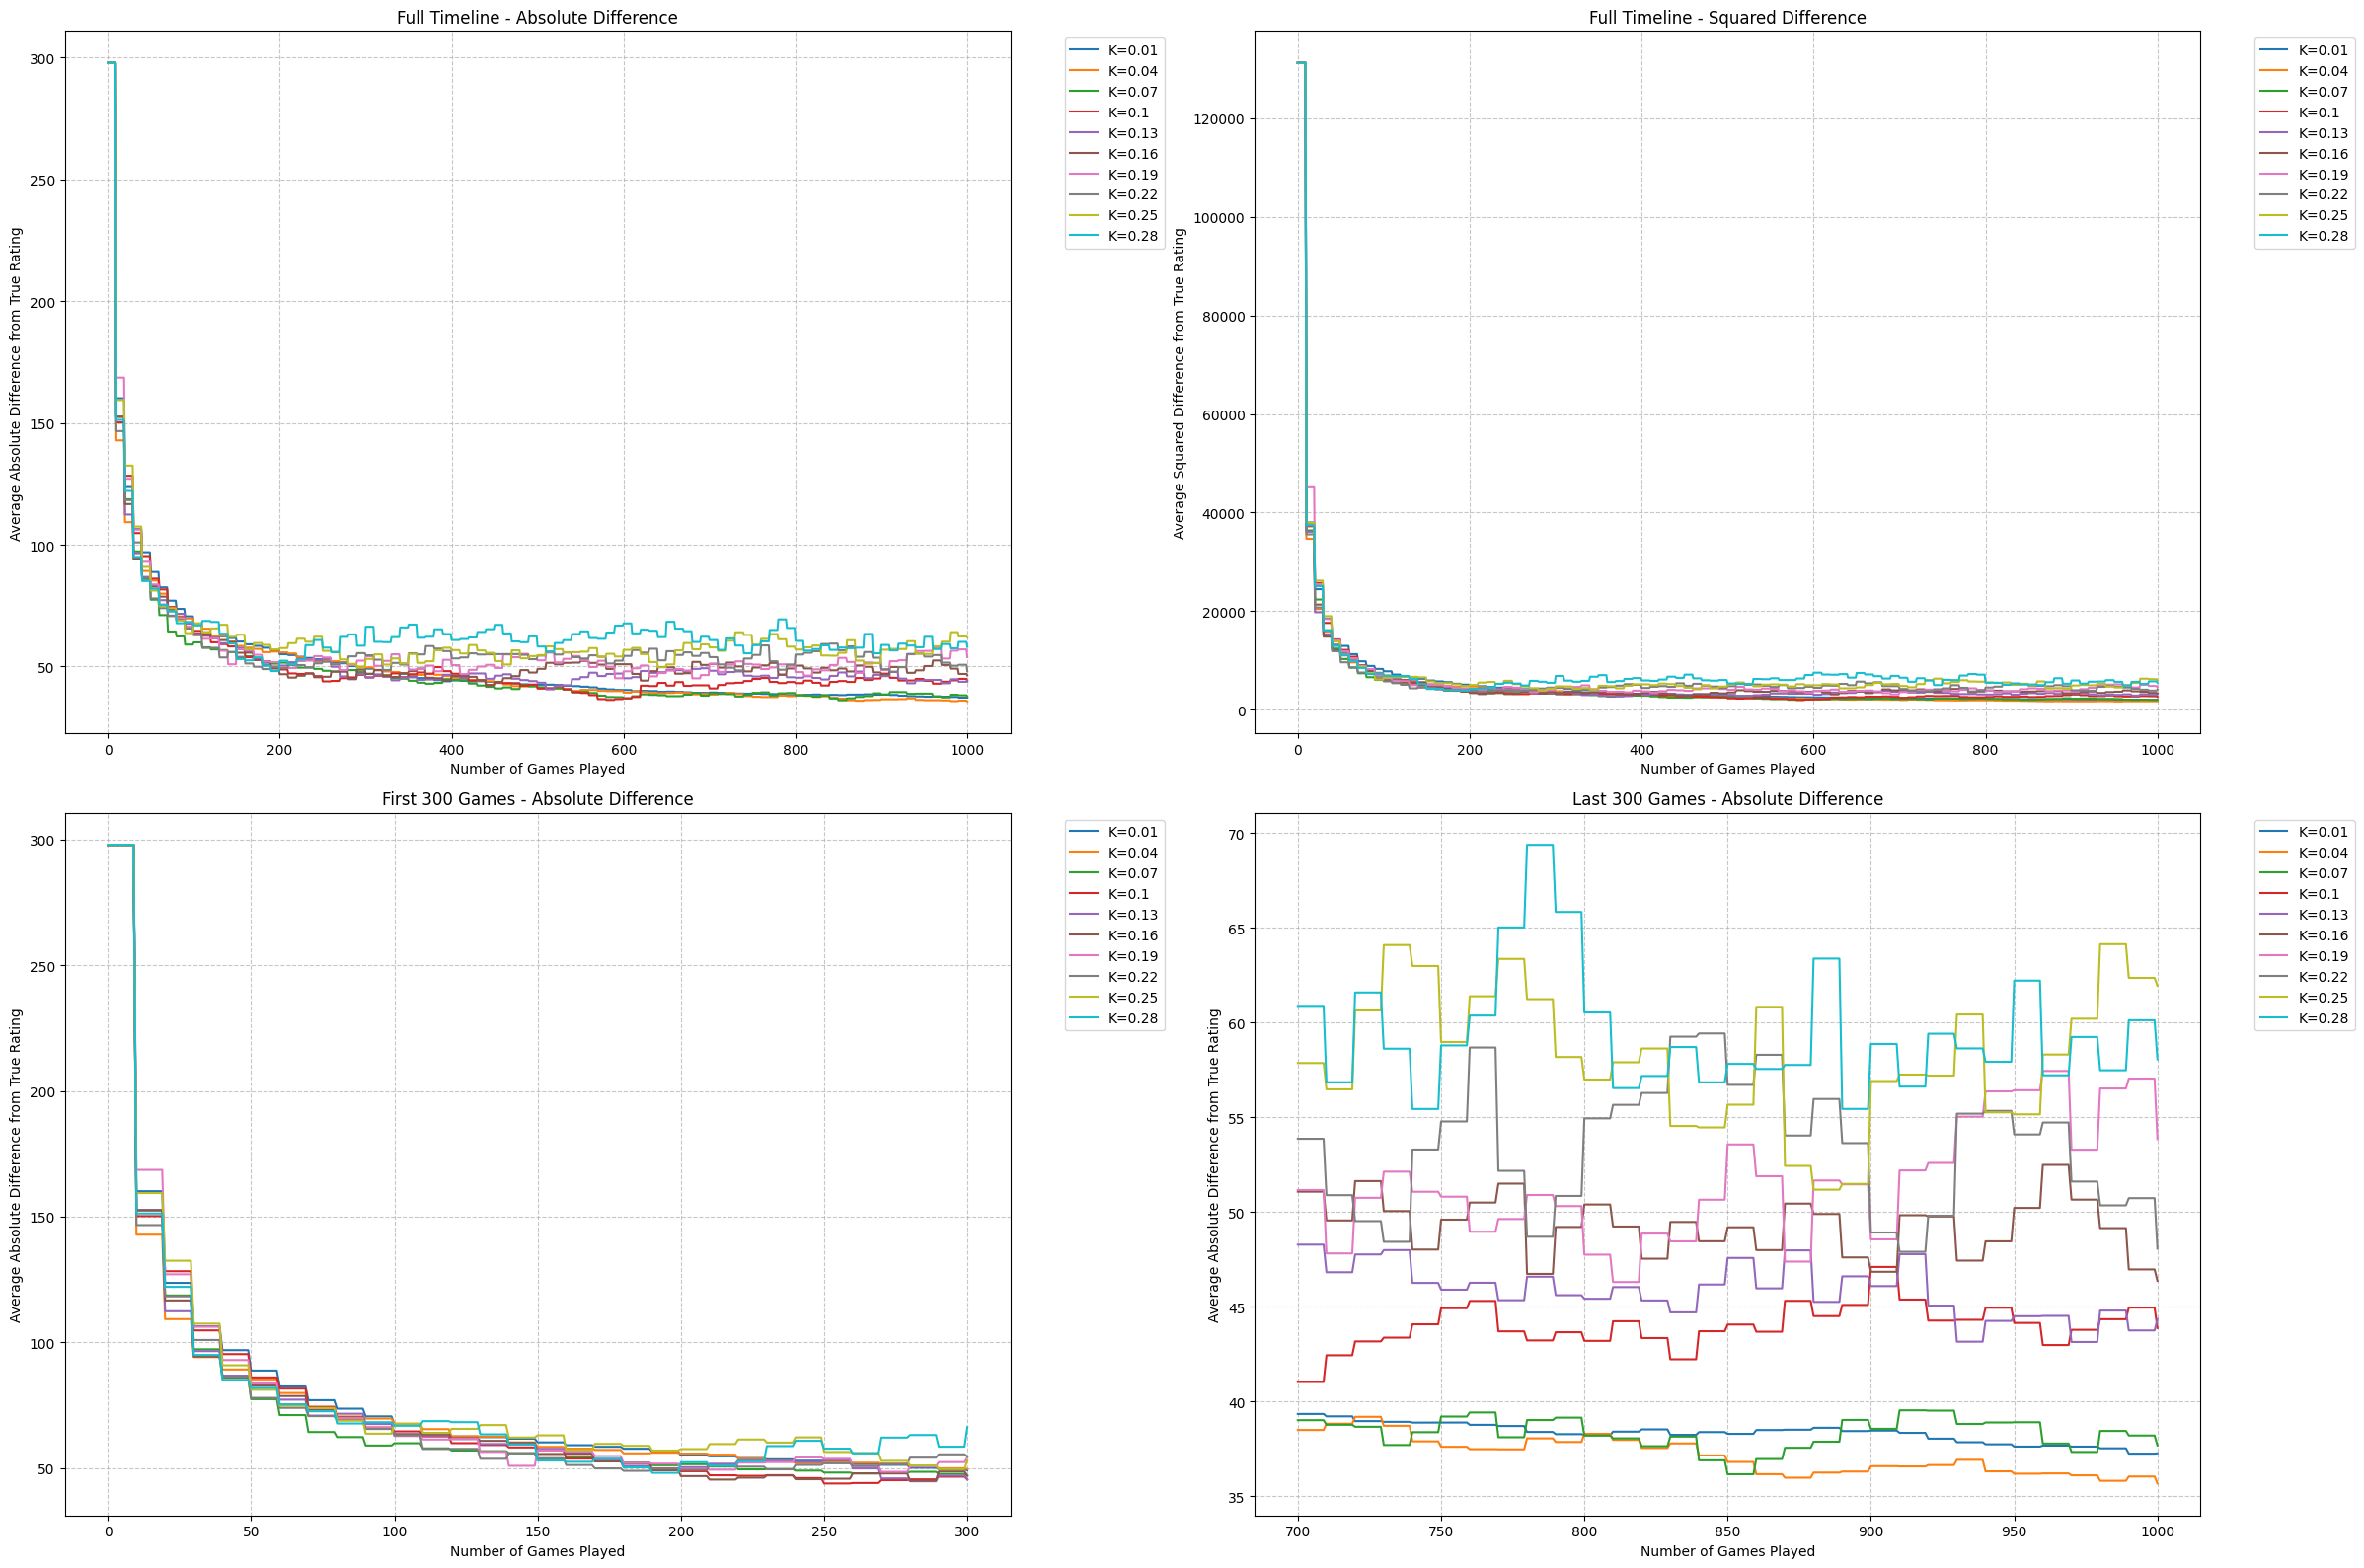

Convergence Statistics for Different K Values:
--------------------------------------------------------------------------------
K Value    Games to        Convergent   Min Value    Max Value   
           Converge        Value        in Zone      in Zone     
--------------------------------------------------------------------------------
0.01       771             38.44        38.22        38.71       
0.04       735             37.88        37.48        38.72       
0.07       560             38.04        36.91        39.13       
0.1        225             45.73        43.92        47.23       
0.13       165             52.05        49.69        56.25       
0.16       246             46.89        45.03        48.69       
0.19       170             52.17        49.42        54.83       
0.22       239             52.25        48.53        55.51       
0.25       145             59.70        57.03        63.07       
0.28       352             63.39        60.90        67.22       

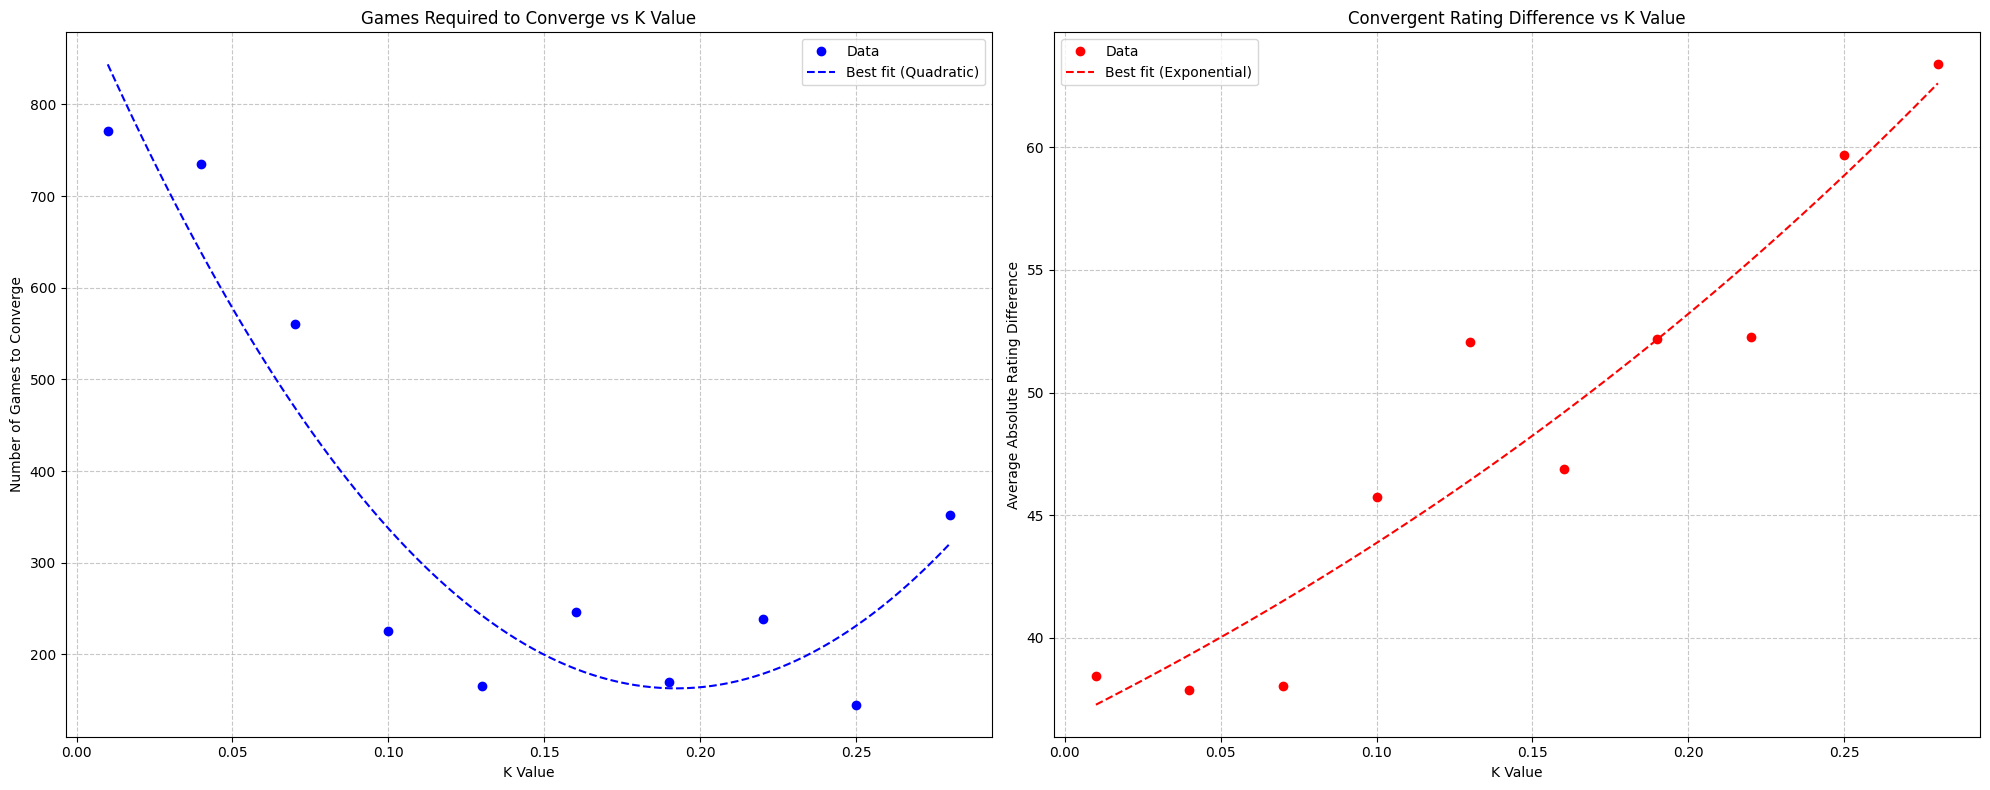

Games to Reach Rating Difference Thresholds:
----------------------------------------------------------------------
K Value    ≤ 100        ≤ 75         ≤ 50         ≤ 25        
----------------------------------------------------------------------
0.01       40           80           290          Never       
0.04       30           70           290          Never       
0.07       30           60           220          Never       
0.1        40           70           190          Never       
0.13       30           70           190          Never       
0.16       30           70           190          Never       
0.19       40           70           200          Never       
0.22       40           60           170          Never       
0.25       40           60           290          Never       
0.28       30           70           190          Never       


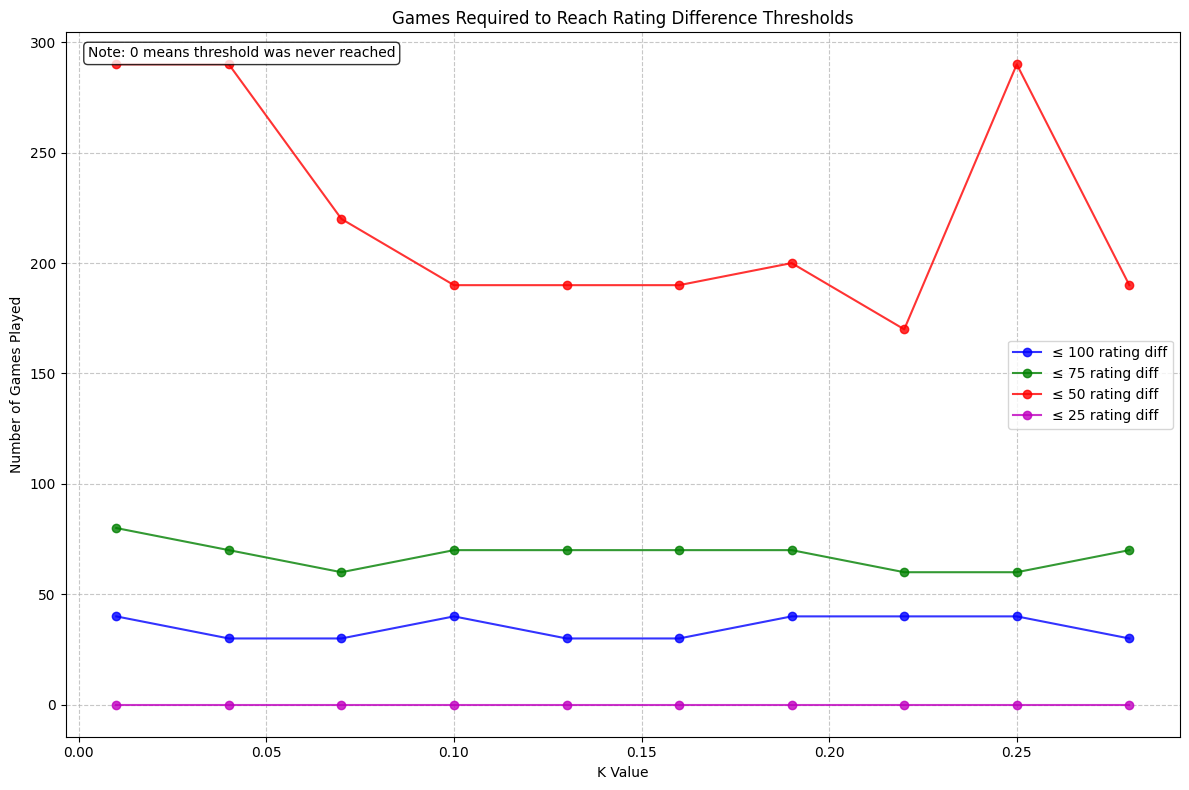


Ranking Deviation for Different K Values:
--------------------------------------------------
K Value    Ranking Deviation (%)
--------------------------------------------------
0.01       1.81                
0.04       2.07                
0.07       2.24                
0.1        2.69                
0.13       2.94                
0.16       3.05                
0.19       3.34                
0.22       3.42                
0.25       3.80                
0.28       3.91                


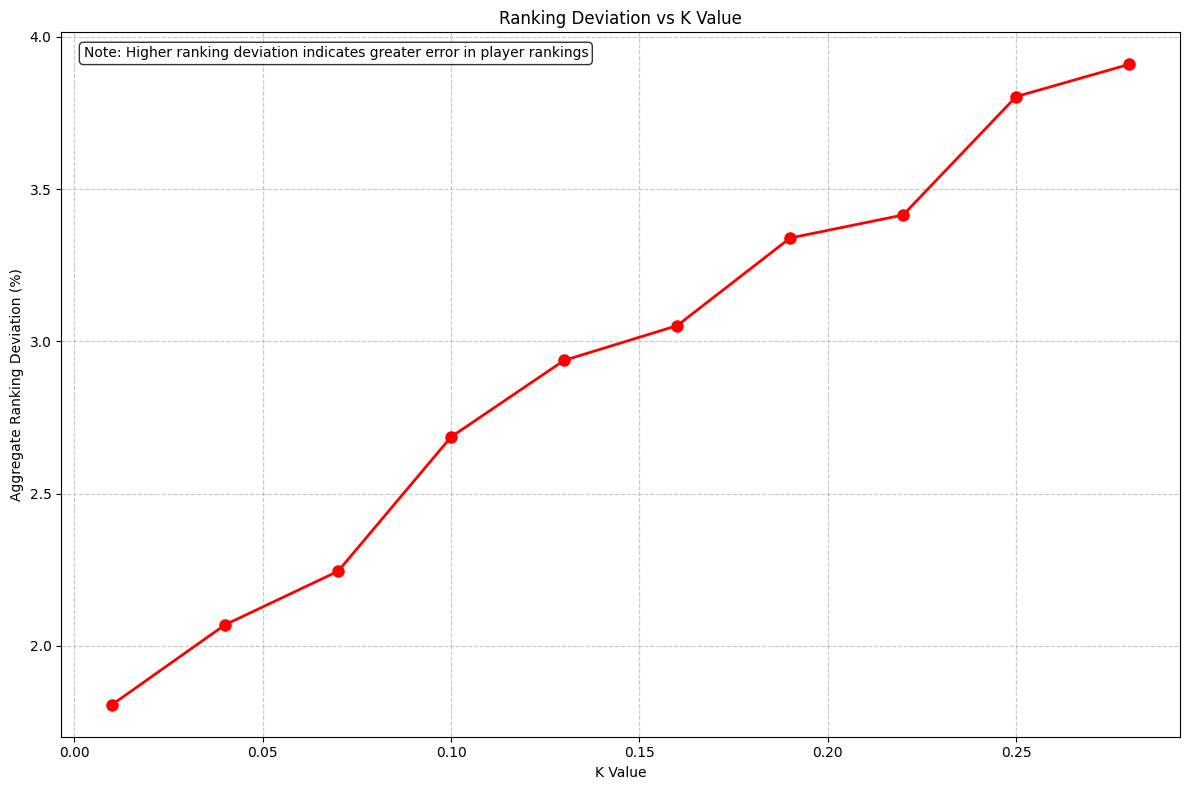


MSE Values for Different K Values:
----------------------------------------------------------------------
K Value    Adjustment MSE            Convergence MSE          
----------------------------------------------------------------------
0.01       5277.94                   0.37                     
0.04       5197.80                   0.72                     
0.07       5293.72                   1.60                     
0.1        5173.33                   11.48                    
0.13       5283.33                   36.98                    
0.16       5460.87                   5.88                     
0.19       6016.46                   8.53                     
0.22       5540.09                   8.55                     
0.25       5942.27                   21.05                    
0.28       5553.94                   14.29                    
----------------------------------------------------------------------


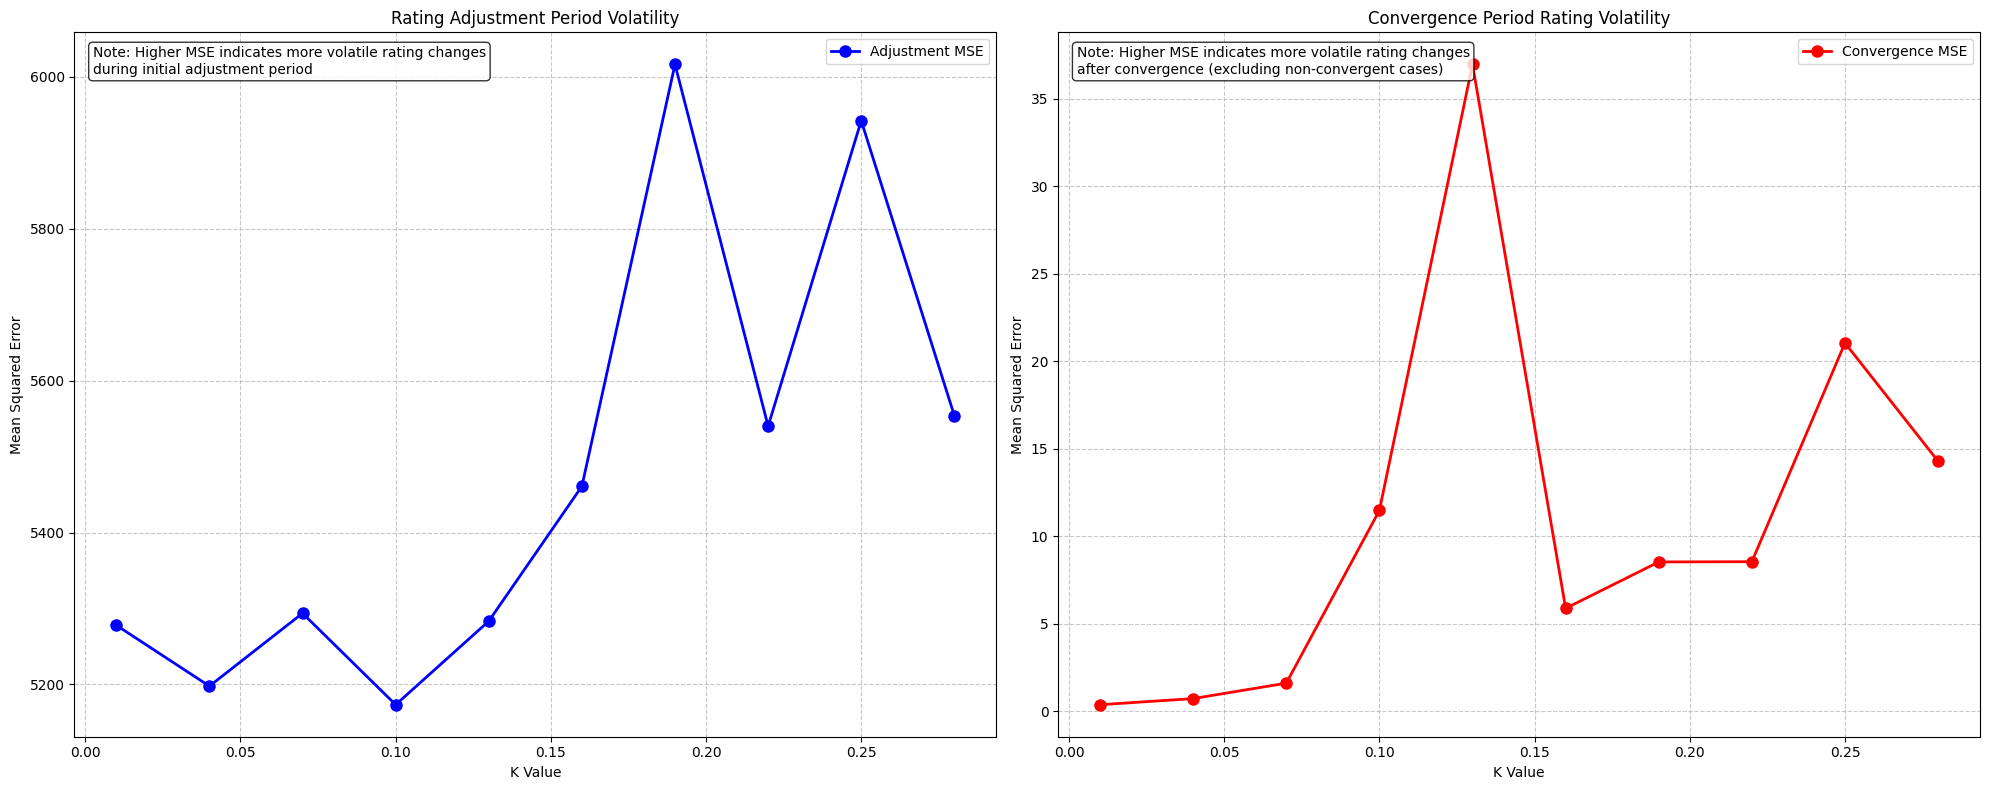

In [68]:
# Graphing and Printing Results

# Analysis of Absolute and Squared Rating Deviation Over Time

graph_aggregate_avg_diffs(num_games, k_values, avg_abs_diff_glicko2, avg_sq_diff_glicko2)

# Analysis of Convergence Statistics

print_convergence_stats(k_values, glicko2_conv_stats)

# Create figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

graph_games_to_converge(k_values, glicko2_conv_stats, ax1)
graph_convergent_values(k_values, glicko2_conv_stats, ax2)

plt.tight_layout()
plt.show()

# Analysis of Convergence Thresholds (Speed of convergence)

# Print convergence threshold statistics
print_convergence_threshold_speed(k_values, glicko2_avg_conv_25, glicko2_avg_conv_50, glicko2_avg_conv_75, glicko2_avg_conv_100)

# Plot each threshold
graph_convergence_thresholds_speed(k_values, glicko2_avg_conv_25, glicko2_avg_conv_50, glicko2_avg_conv_75, glicko2_avg_conv_100)

# Analysis of Ranking Deviation (Accuracy of Rankings)

# Print ranking deviation statistics
print_ranking_deviation(k_values, glicko2_ranking_dev)

# Plot ranking deviation
graph_ranking_deviation(k_values, glicko2_ranking_dev)

# Analysis of Rating Volatility (Based on Mean Squared Error)

# Print rating volatility statistics
print_rating_volatility(k_values, glicko2_adj_mse, glicko2_conv_mse)

# Graph rating volatility during adjustment and convergence periods
graph_rating_volatility(k_values, glicko2_adj_mse, glicko2_conv_mse)


In [69]:
# Optimal K Value Determination and Summary Table

# Convert metrics to numpy arrays and normalize them
glicko2_metrics_data = {
    'Adjustment MSE': np.asarray(glicko2_adj_mse),
    'Convergence MSE': np.asarray(glicko2_conv_mse),
    'Games to Converge': np.asarray(glicko2_conv_stats)[:,0],
    'Convergent Value': np.asarray(glicko2_conv_stats)[:,1],
    'Conv ≤25': np.asarray(glicko2_avg_conv_25),
    'Conv ≤50': np.asarray(glicko2_avg_conv_50),
    'Conv ≤75': np.asarray(glicko2_avg_conv_75),
    'Conv ≤100': np.asarray(glicko2_avg_conv_100),
    'Ranking Dev': np.asarray(glicko2_ranking_dev)
}

# Normalize all metrics
glicko2_norm_metrics = {k: min_normalize(v) for k, v in glicko2_metrics_data.items()}

print_normed_metrics(k_values, glicko2_norm_metrics)


Normalized Statistics (0-1 scale):
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
K Value Adjustment MSE      Convergence MSE     Games to Converge   Convergent Value    Conv ≤25            Conv ≤50            Conv ≤75            Conv ≤100           Ranking Dev         
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
0.01    0.876               1.000               0.000               0.978               0.000               0.000               0.000               0.000               1.000               
0.04    0.971               0.990               0.058               1.000               0.000               0.000               0.500               1.000               0.875               
0.07    0.857               0.966  


Weighted Combined Scores (higher is better):
--------------------------------------------------
K Value    Score      Rank      
--------------------------------------------------
0.07       0.736    #1
0.1        0.666    #2
0.04       0.658    #3
0.16       0.646    #4
0.01       0.583    #5
0.13       0.579    #6
0.22       0.539    #7
0.19       0.474    #8
0.28       0.367    #9
0.25       0.341    #10
--------------------------------------------------


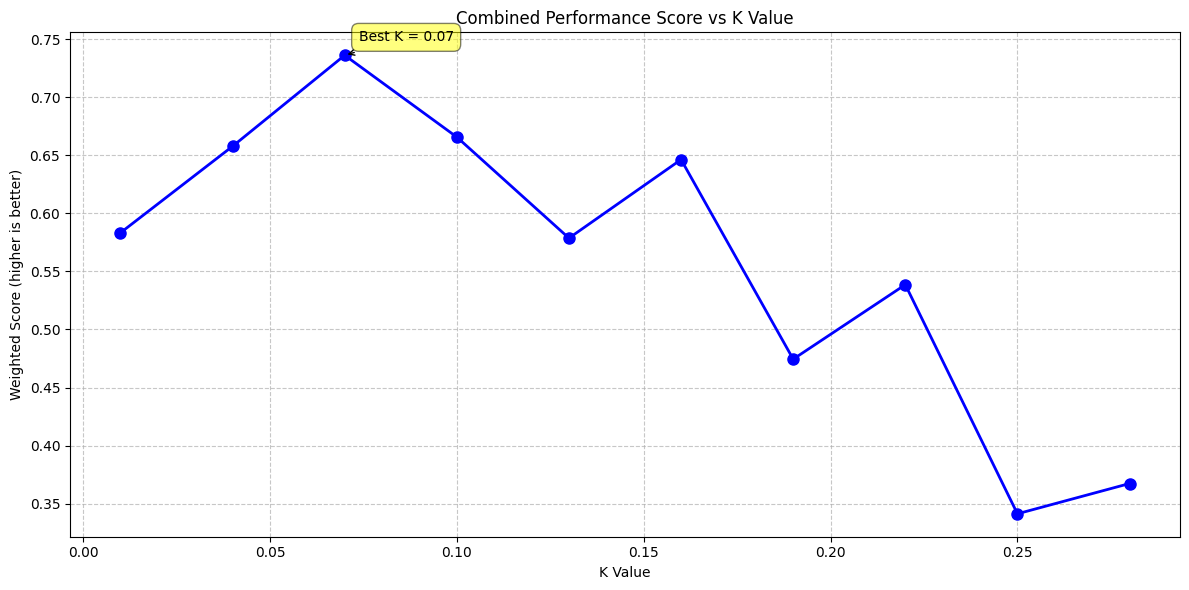

In [70]:
# Finding the optimal K value based on weighted metrics

# Already defined above
# spd, acc, vol = 0.4, 0.4, 0.2  # Speed, Accuracy, Volatility weights

# # Define weights for each metric
# # Adjustable eights for main categories: Speed, Accuracy, Volatility
# weights = {
#     # Speed 
#     'Games to Converge': spd * 0.5,
#     'Conv ≤25': spd * 0.125,
#     'Conv ≤50': spd * 0.125,
#     'Conv ≤75': spd * 0.125,
#     'Conv ≤100': spd * 0.125,
#     # Accuracy 
#     'Ranking Dev': acc * 0.5,
#     'Convergent Value': acc * 0.5,
#     # Volatility 
#     'Adjustment MSE': vol * 0.5,
#     'Convergence MSE': vol * 0.5
# }

# Calculate weighted scores
glicko2_weighted_scores = []

for i in range(k_len):
    score = sum(glicko2_norm_metrics[metric][i] * weights[metric] for metric in weights.keys())
    glicko2_weighted_scores.append(score)

# Create sorted weighted scores
# Combine the arrays into a (N, 2) array
results = np.vstack((k_values, glicko2_weighted_scores)).T

# Sort the combined array by the second column (scores), descending
glicko2_sorted_scores = results[results[:, 1].argsort()[::-1]]

# Print results
print_optimal_param(glicko2_sorted_scores)

# Plot results
graph_optimal_param(k_values, glicko2_weighted_scores)